In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import torch

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from transformers import BertModel, BertTokenizer

import matplotlib.pyplot as plt

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#Synonyms of Run

In [ ]:
wn.synsets('run')

[Synset('run.n.01'),
 Synset('test.n.05'),
 Synset('footrace.n.01'),
 Synset('streak.n.01'),
 Synset('run.n.05'),
 Synset('run.n.06'),
 Synset('run.n.07'),
 Synset('run.n.08'),
 Synset('run.n.09'),
 Synset('run.n.10'),
 Synset('rivulet.n.01'),
 Synset('political_campaign.n.01'),
 Synset('run.n.13'),
 Synset('discharge.n.06'),
 Synset('run.n.15'),
 Synset('run.n.16'),
 Synset('run.v.01'),
 Synset('scat.v.01'),
 Synset('run.v.03'),
 Synset('operate.v.01'),
 Synset('run.v.05'),
 Synset('run.v.06'),
 Synset('function.v.01'),
 Synset('range.v.01'),
 Synset('campaign.v.01'),
 Synset('play.v.18'),
 Synset('run.v.11'),
 Synset('tend.v.01'),
 Synset('run.v.13'),
 Synset('run.v.14'),
 Synset('run.v.15'),
 Synset('run.v.16'),
 Synset('prevail.v.03'),
 Synset('run.v.18'),
 Synset('run.v.19'),
 Synset('carry.v.15'),
 Synset('run.v.21'),
 Synset('guide.v.05'),
 Synset('run.v.23'),
 Synset('run.v.24'),
 Synset('run.v.25'),
 Synset('run.v.26'),
 Synset('run.v.27'),
 Synset('run.v.28'),
 Synset('run.v.

In [ ]:
wn.synonyms('run')

[['tally'],
 ['test', 'trial'],
 ['foot_race', 'footrace'],
 ['streak'],
 ['running', 'running_game', 'running_play'],
 [],
 ['running'],
 [],
 [],
 [],
 ['rill', 'rivulet', 'runnel', 'streamlet'],
 ['campaign', 'political_campaign'],
 ['ladder', 'ravel'],
 ['discharge', 'outpouring'],
 [],
 [],
 [],
 ['break_away',
  'bunk',
  'escape',
  'fly_the_coop',
  'head_for_the_hills',
  'hightail_it',
  'lam',
  'run_away',
  'scarper',
  'scat',
  'take_to_the_woods',
  'turn_tail'],
 ['extend', 'go', 'lead', 'pass'],
 ['operate'],
 ['go'],
 ['course', 'feed', 'flow'],
 ['function', 'go', 'operate', 'work'],
 ['range'],
 ['campaign'],
 ['play'],
 [],
 ['be_given', 'incline', 'lean', 'tend'],
 [],
 [],
 [],
 [],
 ['die_hard', 'endure', 'persist', 'prevail'],
 [],
 ['execute'],
 ['carry'],
 [],
 ['draw', 'guide', 'pass'],
 ['lead'],
 [],
 ['black_market'],
 [],
 ['bleed'],
 [],
 [],
 ['run_for'],
 [],
 ['consort'],
 [],
 [],
 ['ply'],
 ['hunt', 'hunt_down', 'track_down'],
 ['race'],
 ['go', '

In [ ]:
#separate nouns and verbs

In [ ]:
synonyms_sentences_nouns = []

In [ ]:
synonyms_sentences_verbs = []

In [ ]:
#example of how example sentences are received
wn.synset('run.v.41').examples()

['the sweater unraveled']

In [ ]:
synonyms_sentences_nouns.append((wn.synset('run.n.01').examples()[0], 'run.n.01'))
synonyms_sentences_nouns.append((wn.synset('run.n.01').examples()[1], 'run.n.01'))
synonyms_sentences_nouns.append((wn.synset('test.n.05').examples()[0], 'test.n.05'))
synonyms_sentences_nouns.append((wn.synset('test.n.05').examples()[1], 'test.n.05'))
synonyms_sentences_nouns.append((wn.synset('footrace.n.01').examples()[0], 'footrace.n.01'))
synonyms_sentences_nouns.append((wn.synset('streak.n.01').examples()[0], 'streak.n.01'))
synonyms_sentences_nouns.append((wn.synset('streak.n.01').examples()[1], 'streak.n.01'))
synonyms_sentences_nouns.append((wn.synset('run.n.05').examples()[0], 'run.n.05'))
synonyms_sentences_nouns.append((wn.synset('run.n.05').examples()[1], 'run.n.05'))
synonyms_sentences_nouns.append((wn.synset('run.n.06').examples()[0], 'run.n.06'))
synonyms_sentences_nouns.append((wn.synset('run.n.07').examples()[0], 'run.n.07'))
synonyms_sentences_nouns.append((wn.synset('run.n.07').examples()[1], 'run.n.07'))
synonyms_sentences_nouns.append((wn.synset('run.n.08').examples()[0], 'run.n.08'))
synonyms_sentences_nouns.append((wn.synset('run.n.09').examples()[0], 'run.n.09'))
synonyms_sentences_nouns.append((wn.synset('run.n.10').examples()[0], 'run.n.10'))
synonyms_sentences_nouns.append((wn.synset('political_campaign.n.01').examples()[0], 'political_campaign.n.01'))
synonyms_sentences_nouns.append((wn.synset('political_campaign.n.01').examples()[1], 'political_campaign.n.01'))
synonyms_sentences_nouns.append((wn.synset('run.n.13').examples()[0], 'run.n.13'))
synonyms_sentences_nouns.append((wn.synset('run.n.15').examples()[0], 'run.n.15'))
synonyms_sentences_nouns.append((wn.synset('run.n.15').examples()[1], 'run.n.15'))
synonyms_sentences_nouns.append((wn.synset('run.n.16').examples()[0], 'run.n.16'))
#14 unique synsets

synonyms_sentences_verbs.append((wn.synset('run.v.01').examples()[0], 'run.v.01'))
synonyms_sentences_verbs.append((wn.synset('run.v.01').examples()[1], 'run.v.01'))
synonyms_sentences_verbs.append((wn.synset('scat.v.01').examples()[0], 'scat.v.01'))
synonyms_sentences_verbs.append((wn.synset('scat.v.01').examples()[1], 'scat.v.01'))
synonyms_sentences_verbs.append((wn.synset('run.v.03').examples()[0], 'run.v.03'))
synonyms_sentences_verbs.append((wn.synset('run.v.03').examples()[1], 'run.v.03'))
synonyms_sentences_verbs.append((wn.synset('run.v.03').examples()[2], 'run.v.03'))
synonyms_sentences_verbs.append((wn.synset('run.v.03').examples()[3], 'run.v.03'))
synonyms_sentences_verbs.append((wn.synset('operate.v.01').examples()[0], 'operate.v.01'))
synonyms_sentences_verbs.append((wn.synset('run.v.05').examples()[0], 'run.v.05'))
synonyms_sentences_verbs.append((wn.synset('run.v.05').examples()[1], 'run.v.05'))
synonyms_sentences_verbs.append((wn.synset('run.v.06').examples()[0], 'run.v.06'))
synonyms_sentences_verbs.append((wn.synset('run.v.06').examples()[1], 'run.v.06'))
synonyms_sentences_verbs.append((wn.synset('function.v.01').examples()[0], 'function.v.01'))
synonyms_sentences_verbs.append((wn.synset('function.v.01').examples()[1], 'function.v.01'))
synonyms_sentences_verbs.append((wn.synset('function.v.01').examples()[2], 'function.v.01'))
synonyms_sentences_verbs.append((wn.synset('range.v.01').examples()[0], 'range.v.01'))
synonyms_sentences_verbs.append((wn.synset('range.v.01').examples()[1], 'range.v.01'))
synonyms_sentences_verbs.append((wn.synset('range.v.01').examples()[2], 'range.v.01'))
synonyms_sentences_verbs.append((wn.synset('range.v.01').examples()[3], 'range.v.01'))
synonyms_sentences_verbs.append((wn.synset('campaign.v.01').examples()[0], 'campaign.v.01'))
synonyms_sentences_verbs.append((wn.synset('play.v.18').examples()[0], 'play.v.18'))
synonyms_sentences_verbs.append((wn.synset('play.v.18').examples()[1], 'play.v.18'))
synonyms_sentences_verbs.append((wn.synset('play.v.18').examples()[2], 'play.v.18'))
synonyms_sentences_verbs.append((wn.synset('run.v.11').examples()[0], 'run.v.11'))
synonyms_sentences_verbs.append((wn.synset('run.v.11').examples()[1], 'run.v.11'))
synonyms_sentences_verbs.append((wn.synset('run.v.11').examples()[2], 'run.v.11'))
synonyms_sentences_verbs.append((wn.synset('tend.v.01').examples()[0], 'tend.v.01'))
synonyms_sentences_verbs.append((wn.synset('tend.v.01').examples()[1], 'tend.v.01'))
synonyms_sentences_verbs.append((wn.synset('tend.v.01').examples()[2], 'tend.v.01'))
synonyms_sentences_verbs.append((wn.synset('run.v.13').examples()[0], 'run.v.13'))
synonyms_sentences_verbs.append((wn.synset('run.v.14').examples()[0], 'run.v.14'))
synonyms_sentences_verbs.append((wn.synset('run.v.14').examples()[1], 'run.v.14'))
synonyms_sentences_verbs.append((wn.synset('run.v.14').examples()[2], 'run.v.14'))
synonyms_sentences_verbs.append((wn.synset('run.v.15').examples()[0], 'run.v.15'))
synonyms_sentences_verbs.append((wn.synset('run.v.15').examples()[1], 'run.v.15'))
synonyms_sentences_verbs.append((wn.synset('run.v.16').examples()[0], 'run.v.16'))
synonyms_sentences_verbs.append((wn.synset('run.v.16').examples()[1], 'run.v.16'))
synonyms_sentences_verbs.append((wn.synset('prevail.v.03').examples()[1], 'prevail.v.03'))
synonyms_sentences_verbs.append((wn.synset('run.v.18').examples()[0], 'run.v.18'))
synonyms_sentences_verbs.append((wn.synset('run.v.19').examples()[0], 'run.v.19'))
synonyms_sentences_verbs.append((wn.synset('run.v.19').examples()[1], 'run.v.19'))
synonyms_sentences_verbs.append((wn.synset('run.v.19').examples()[2], 'run.v.19'))
synonyms_sentences_verbs.append((wn.synset('carry.v.15').examples()[0], 'carry.v.15'))
synonyms_sentences_verbs.append((wn.synset('carry.v.15').examples()[1], 'carry.v.15'))
synonyms_sentences_verbs.append((wn.synset('carry.v.15').examples()[2], 'carry.v.15'))
synonyms_sentences_verbs.append((wn.synset('run.v.21').examples()[0], 'run.v.21'))
synonyms_sentences_verbs.append((wn.synset('guide.v.05').examples()[0], 'guide.v.05'))
synonyms_sentences_verbs.append((wn.synset('guide.v.05').examples()[1], 'guide.v.05'))
synonyms_sentences_verbs.append((wn.synset('guide.v.05').examples()[2], 'guide.v.05'))
synonyms_sentences_verbs.append((wn.synset('run.v.23').examples()[0], 'run.v.23'))
synonyms_sentences_verbs.append((wn.synset('run.v.26').examples()[0], 'run.v.26'))
synonyms_sentences_verbs.append((wn.synset('run.v.27').examples()[0], 'run.v.27'))
synonyms_sentences_verbs.append((wn.synset('run.v.29').examples()[0], 'run.v.29'))
synonyms_sentences_verbs.append((wn.synset('run.v.30').examples()[0], 'run.v.30'))
synonyms_sentences_verbs.append((wn.synset('run.v.32').examples()[0], 'run.v.32'))
synonyms_sentences_verbs.append((wn.synset('run.v.34').examples()[0], 'run.v.34'))
synonyms_sentences_verbs.append((wn.synset('run.v.34').examples()[1], 'run.v.34'))
synonyms_sentences_verbs.append((wn.synset('hunt.v.01').examples()[1], 'hunt.v.01'))
synonyms_sentences_verbs.append((wn.synset('hunt.v.01').examples()[2], 'hunt.v.01'))
synonyms_sentences_verbs.append((wn.synset('race.v.02').examples()[0], 'race.v.02'))
synonyms_sentences_verbs.append((wn.synset('race.v.02').examples()[1], 'race.v.02'))
synonyms_sentences_verbs.append((wn.synset('move.v.13').examples()[0], 'move.v.13'))
synonyms_sentences_verbs.append((wn.synset('move.v.13').examples()[1], 'move.v.13'))
synonyms_sentences_verbs.append((wn.synset('melt.v.01').examples()[0], 'melt.v.01'))
synonyms_sentences_verbs.append((wn.synset('melt.v.01').examples()[1], 'melt.v.01'))
synonyms_sentences_verbs.append((wn.synset('melt.v.01').examples()[2], 'melt.v.01'))
synonyms_sentences_verbs.append((wn.synset('ladder.v.01').examples()[0], 'ladder.v.01'))
#34 unique synsets

In [ ]:
synonyms_sentences_nouns

[('the Yankees scored 3 runs in the bottom of the 9th', 'run.n.01'),
 ('their first tally came in the 3rd inning', 'run.n.01'),
 ('in the experimental trials the amount of carbon was measured separately',
  'test.n.05'),
 ('he called each flip of the coin a new trial', 'test.n.05'),
 ('she broke the record for the half-mile run', 'footrace.n.01'),
 ('had a streak of bad luck', 'streak.n.01'),
 ('Nicklaus had a run of birdies', 'streak.n.01'),
 ('the defensive line braced to stop the run', 'run.n.05'),
 ('the coach put great emphasis on running', 'run.n.05'),
 ('the ship made its run in record time', 'run.n.06'),
 ('he broke into a run', 'run.n.07'),
 ('his daily run keeps him fit', 'run.n.07'),
 ('the assembly line was on a 12-hour run', 'run.n.08'),
 ('he has the run of the house', 'run.n.09'),
 ('a daily run of 100,000 gallons of paint', 'run.n.10'),
 ('I managed his campaign for governor', 'political_campaign.n.01'),
 ('he is raising money for a Senate run', 'political_campaign.n.01

In [ ]:
synonyms_sentences_verbs

[("Don't run--you'll be out of breath", 'run.v.01'),
 ('The children ran to the store', 'run.v.01'),
 ('If you see this man, run!', 'scat.v.01'),
 ('The burglars escaped before the police showed up', 'scat.v.01'),
 ('Service runs all the way to Cranbury', 'run.v.03'),
 ("His knowledge doesn't go very far", 'run.v.03'),
 ('My memory extends back to my fourth year of life', 'run.v.03'),
 ('The facts extend beyond a consideration of her personal assets',
  'run.v.03'),
 ('She is running a relief operation in the Sudan', 'operate.v.01'),
 ('the story or argument runs as follows', 'run.v.05'),
 ('as the saying goes...', 'run.v.05'),
 ('Water flowed into the cave', 'run.v.06'),
 ('the Missouri feeds into the Mississippi', 'run.v.06'),
 ("The washing machine won't go unless it's plugged in", 'function.v.01'),
 ('Does this old car still run well?', 'function.v.01'),
 ("This old radio doesn't work anymore", 'function.v.01'),
 ('Estimates for the losses in the earthquake range as high as $2 bill

In [ ]:
synonyms_tuples_nouns = []

In [ ]:
synonyms_tuples_verbs = []

In [ ]:
synonyms = ['runs', 'tally', 'trials', 'trial', 'run', 'streak', 'running', 'campaign', 'ran', 'escaped', 'go', 'extends', 'extend', 'goes', 
                     'flowed', 'feed', 'feeds', 'work', 'range', 'ranged', 'play', 'playing', 'tends', 'inclined', 'endure', 'executed', 'carries', 'carried', 
                     'drew', 'melt', 'melted', 'hunted', 'race']

Get the embeddings from last_hidden_state

In [ ]:
for index, sentence in enumerate(synonyms_sentences_nouns):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']

  #short example of tokens
  if index < 5:
    print(tokens)

  #this looks for our word of interest in each list of tokens and gets the index of it, for use in last_hidden_state[0][index] later
  for w in synonyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        #short example of word_index stored
        if index < 5:
          print(word_index)
          print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  synonyms_tuples_nouns.append(new_tuple)

['[CLS]', 'the', 'yankees', 'scored', '3', 'runs', 'in', 'the', 'bottom', 'of', 'the', '9th', '[SEP]']
5

['[CLS]', 'their', 'first', 'tally', 'came', 'in', 'the', '3rd', 'inning', '[SEP]']
3

['[CLS]', 'in', 'the', 'experimental', 'trials', 'the', 'amount', 'of', 'carbon', 'was', 'measured', 'separately', '[SEP]']
4

['[CLS]', 'he', 'called', 'each', 'flip', 'of', 'the', 'coin', 'a', 'new', 'trial', '[SEP]']
10

['[CLS]', 'she', 'broke', 'the', 'record', 'for', 'the', 'half', '-', 'mile', 'run', '[SEP]']
10



In [ ]:
for index, sentence in enumerate(synonyms_sentences_verbs):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']

  #short example of tokens
  if index < 5:
    print(tokens)

  #this looks for our word of interest in each list of tokens and gets the index of it, for use in last_hidden_state[0][index] later
  for w in synonyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        #short example of word_index stored
        if index < 5:
          print(word_index)
          print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  synonyms_tuples_verbs.append(new_tuple)

['[CLS]', 'don', "'", 't', 'run', '-', '-', 'you', "'", 'll', 'be', 'out', 'of', 'breath', '[SEP]']
4

['[CLS]', 'the', 'children', 'ran', 'to', 'the', 'store', '[SEP]']
3

['[CLS]', 'if', 'you', 'see', 'this', 'man', ',', 'run', '!', '[SEP]']
7

['[CLS]', 'the', 'bu', '##rg', '##lars', 'escaped', 'before', 'the', 'police', 'showed', 'up', '[SEP]']
5

['[CLS]', 'service', 'runs', 'all', 'the', 'way', 'to', 'cr', '##an', '##bury', '[SEP]']
2



In [ ]:
#example entry in list_of_tuples
synonyms_tuples_nouns[0]

('run.n.01',
 'the Yankees scored 3 runs in the bottom of the 9th',
 array([ 1.43591329e-01, -6.05638862e-01,  9.24591795e-02,  4.73540008e-01,
        -4.80809450e-01, -2.80180633e-01,  1.34523690e-01,  6.77983284e-01,
         3.96168292e-01,  3.36076468e-02,  5.81527889e-01, -1.34926364e-01,
        -2.02615157e-01,  1.94756597e-01, -9.31733489e-01,  2.54836023e-01,
         9.33433712e-01, -2.50239484e-02, -4.88039136e-01, -1.03706695e-01,
        -4.26451296e-01, -4.51988339e-01, -9.12956297e-02,  2.58735478e-01,
         4.58733559e-01, -1.00717008e+00, -2.27396548e-01,  2.84113824e-01,
        -4.09512728e-01, -1.03120840e+00, -2.70759463e-01,  3.38313401e-01,
        -1.41426042e-01,  2.82857716e-01,  4.03739572e-01, -1.34592801e-01,
         9.01899099e-01, -6.81332886e-01, -7.20707536e-01, -4.14246768e-01,
        -6.99260473e-01, -1.23385060e+00,  8.99528787e-02,  5.56933522e-01,
        -2.21611246e-01, -2.58296818e-01,  7.41376221e-01, -6.94206953e-01,
         4.97544229e

Hierarchical Agglomerative Clustering

In [ ]:
num_clusters_nouns = 14

In [ ]:
num_clusters_verbs = 34

In [ ]:
cluster_nouns = AgglomerativeClustering(linkage='average',n_clusters=num_clusters_nouns).fit([t[2] for t in synonyms_tuples_nouns]) 
cluster_nouns.labels_

array([13,  7, 11,  9,  6, 12,  0,  1,  1,  0,  5,  0,  0, 10,  0,  3,  3,
        2,  4,  0,  8])

In [ ]:
cluster_verbs = AgglomerativeClustering(linkage='average',n_clusters=num_clusters_verbs).fit([t[2] for t in synonyms_tuples_verbs]) 
cluster_verbs.labels_

array([11, 15, 11, 15, 27,  2, 21, 25, 13, 24, 23,  5, 31,  4,  4,  4, 18,
       12, 29, 12, 19, 20,  8,  8,  0,  9,  0, 26,  7, 22,  4, 14, 14, 14,
        3,  3,  3,  3,  6,  6,  3,  3, 33, 20,  1,  1,  3, 17, 17, 17,  3,
        3,  7, 13, 16,  7, 14,  9,  0,  5, 13, 30,  2, 28, 32, 32,  5, 10])

Visualization

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result_nouns = pca.fit_transform([t[2] for t in synonyms_tuples_nouns])

In [ ]:
result_verbs = pca.fit_transform([t[2] for t in synonyms_tuples_verbs])

In [ ]:
# creating a dataframe from the results
df_nouns = pd.DataFrame(result_nouns, [t[1] for t in synonyms_tuples_nouns])

In [ ]:
# creating a dataframe from the results
df_verbs = pd.DataFrame(result_verbs, [t[1] for t in synonyms_tuples_verbs])

In [ ]:
df_nouns['Cluster'] = cluster_nouns.labels_

In [ ]:
df_verbs['Cluster'] = cluster_verbs.labels_

In [ ]:
df_nouns['Synset'] = [t[0] for t in synonyms_tuples_nouns]

In [ ]:
df_verbs['Synset'] = [t[0] for t in synonyms_tuples_verbs]

In [ ]:
df_nouns

,0,1,Cluster,Synset
the Yankees scored 3 runs in the bottom of the 9th,14.122998,4.012707,13,run.n.01
their first tally came in the 3rd inning,7.295063,2.319471,7,run.n.01
in the experimental trials the amount of carbon was measured separately,0.044822,2.124577,11,test.n.05
he called each flip of the coin a new trial,-4.211709,6.228128,9,test.n.05
she broke the record for the half-mile run,-4.033042,4.390060,6,footrace.n.01
had a streak of bad luck,0.338816,-3.823206,12,streak.n.01
Nicklaus had a run of birdies,0.502525,-3.425691,0,streak.n.01
the defensive line braced to stop the run,0.182653,3.297926,1,run.n.05
the coach put great emphasis on running,-3.560367,4.673947,1,run.n.05
the ship made its run in record time,-0.427273,-0.862490,0,run.n.06


In [ ]:
df_verbs

,0,1,Cluster,Synset
Don't run--you'll be out of breath,1.351532,8.085366,11,run.v.01
The children ran to the store,-2.310818,4.636031,15,run.v.01
"If you see this man, run!",2.318535,8.781290,11,scat.v.01
The burglars escaped before the police showed up,-2.500909,1.901520,15,scat.v.01
Service runs all the way to Cranbury,-0.761367,0.816848,27,run.v.03
...,...,...,...,...
run through your presentation before the meeting,7.813873,-0.938377,28,move.v.13
melt butter,2.545600,-4.366255,32,melt.v.01
melt down gold,3.148902,-4.722771,32,melt.v.01
The wax melted in the sun,-2.637262,-2.277167,5,melt.v.01


In [ ]:
#separates each cluster label into filtered labels
filtered_labels_nouns = {}
for i in range(num_clusters_nouns):
    filtered_labels_nouns[i] = df_nouns[df_nouns["Cluster"] == i]

In [ ]:
#separates each cluster label into filtered labels
filtered_labels_verbs = {}
for i in range(num_clusters_verbs):
    filtered_labels_verbs[i] = df_verbs[df_verbs["Cluster"] == i]

In [ ]:
#example of filtered labels grouped
filtered_labels_nouns[13]

,0,1,Cluster,Synset
the Yankees scored 3 runs in the bottom of the 9th,14.122998,4.012707,13,run.n.01


In [ ]:
filtered_labels_verbs[5]

,0,1,Cluster,Synset
Water flowed into the cave,-3.264037,-1.989985,5,run.v.06
The Duke hunted in these woods,-3.592562,0.744466,5,hunt.v.01
The wax melted in the sun,-2.637262,-2.277167,5,melt.v.01


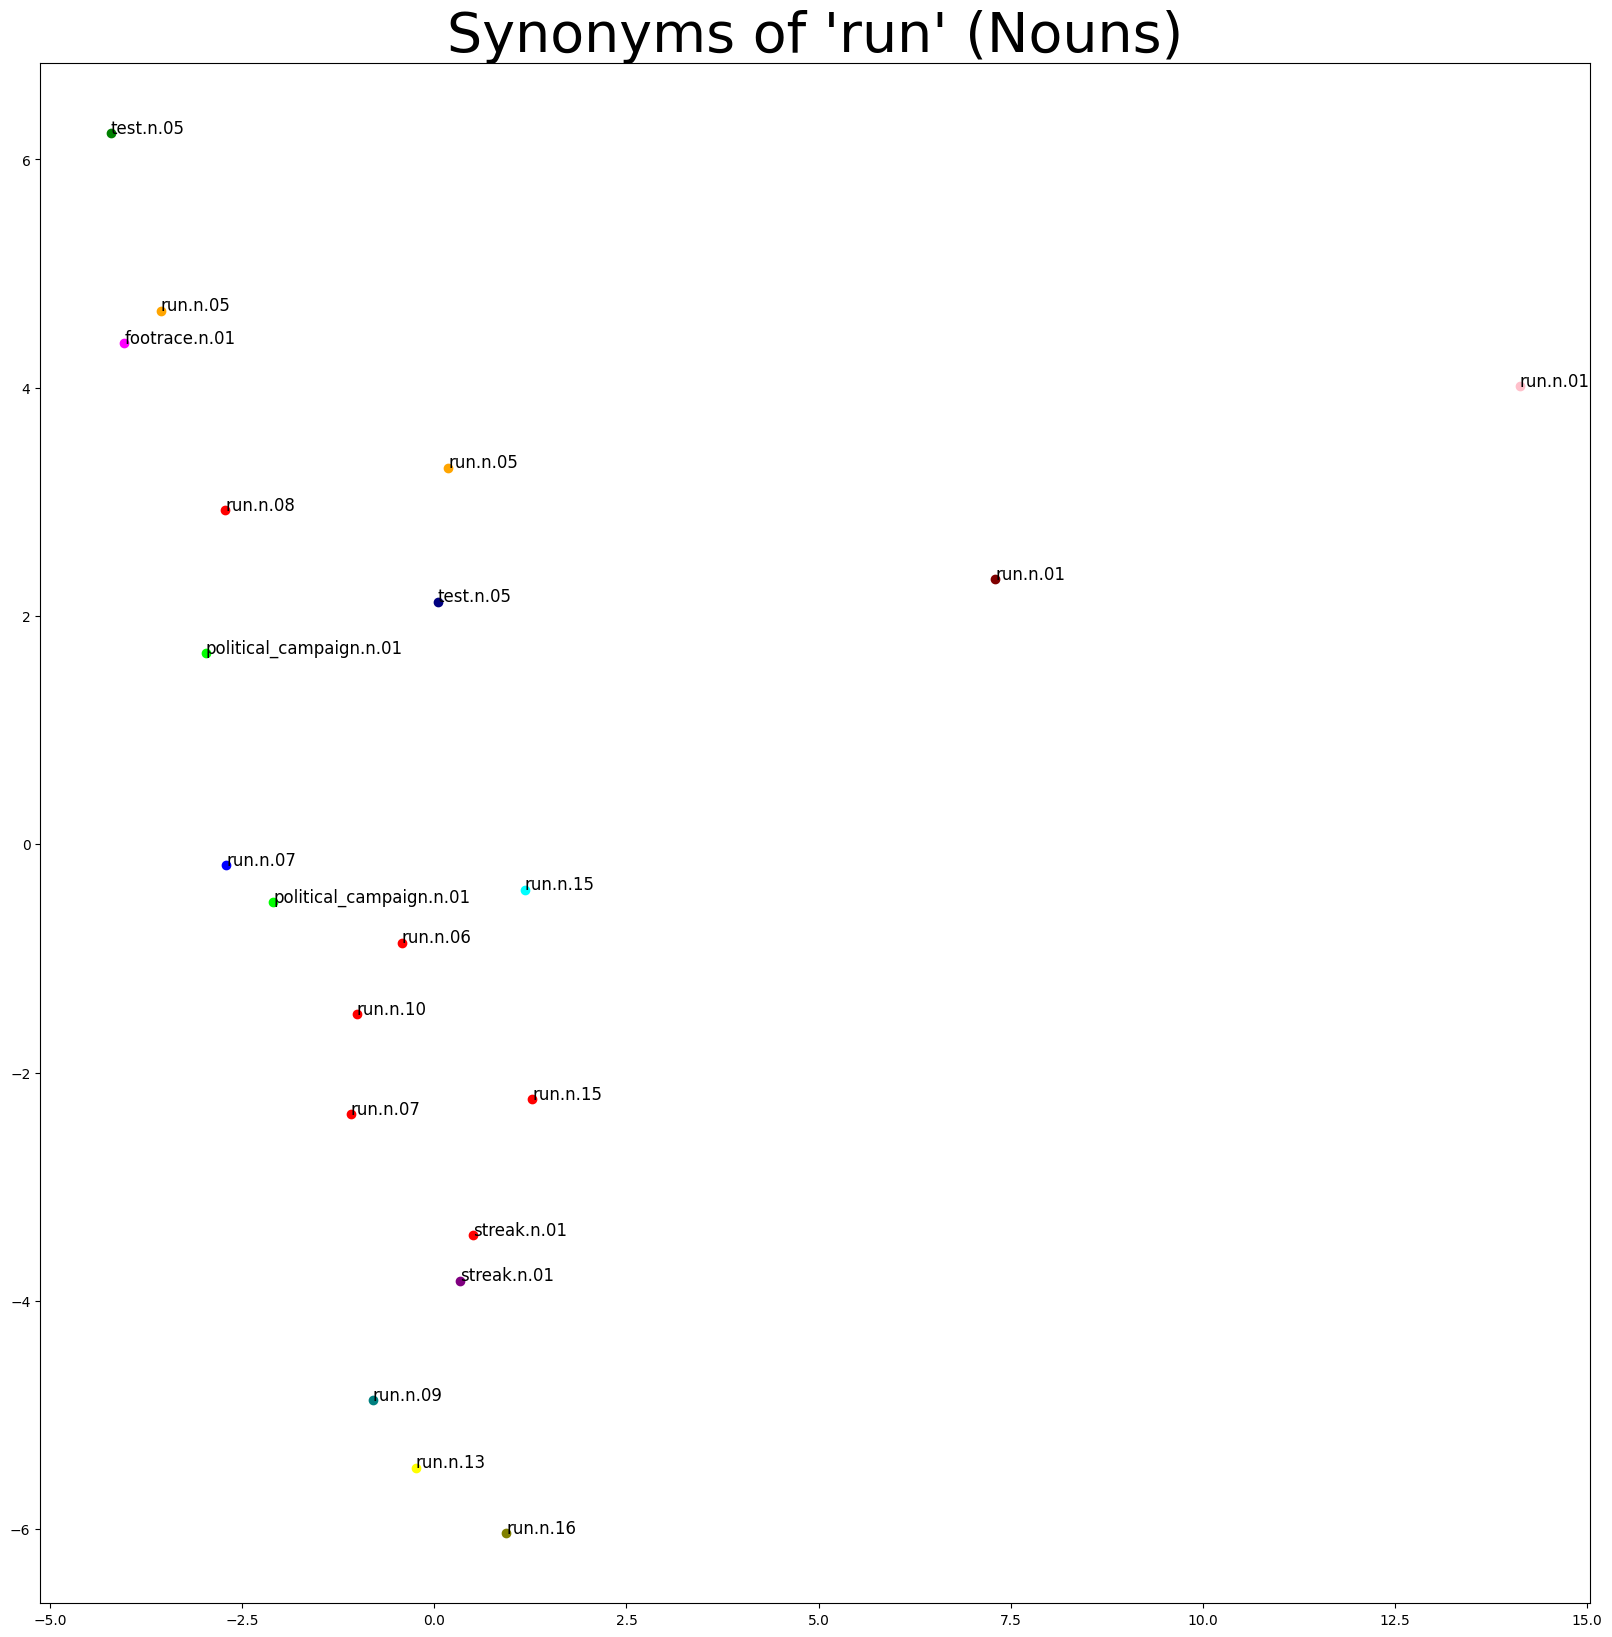

In [ ]:
#nouns
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(20, 20))
for i in range(len(filtered_labels_nouns)):
    x = filtered_labels_nouns[i][0].values
    y = filtered_labels_nouns[i][1].values
    label = filtered_labels_nouns[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Synonyms of 'run' (Nouns)", fontsize = 40)
plt.show()

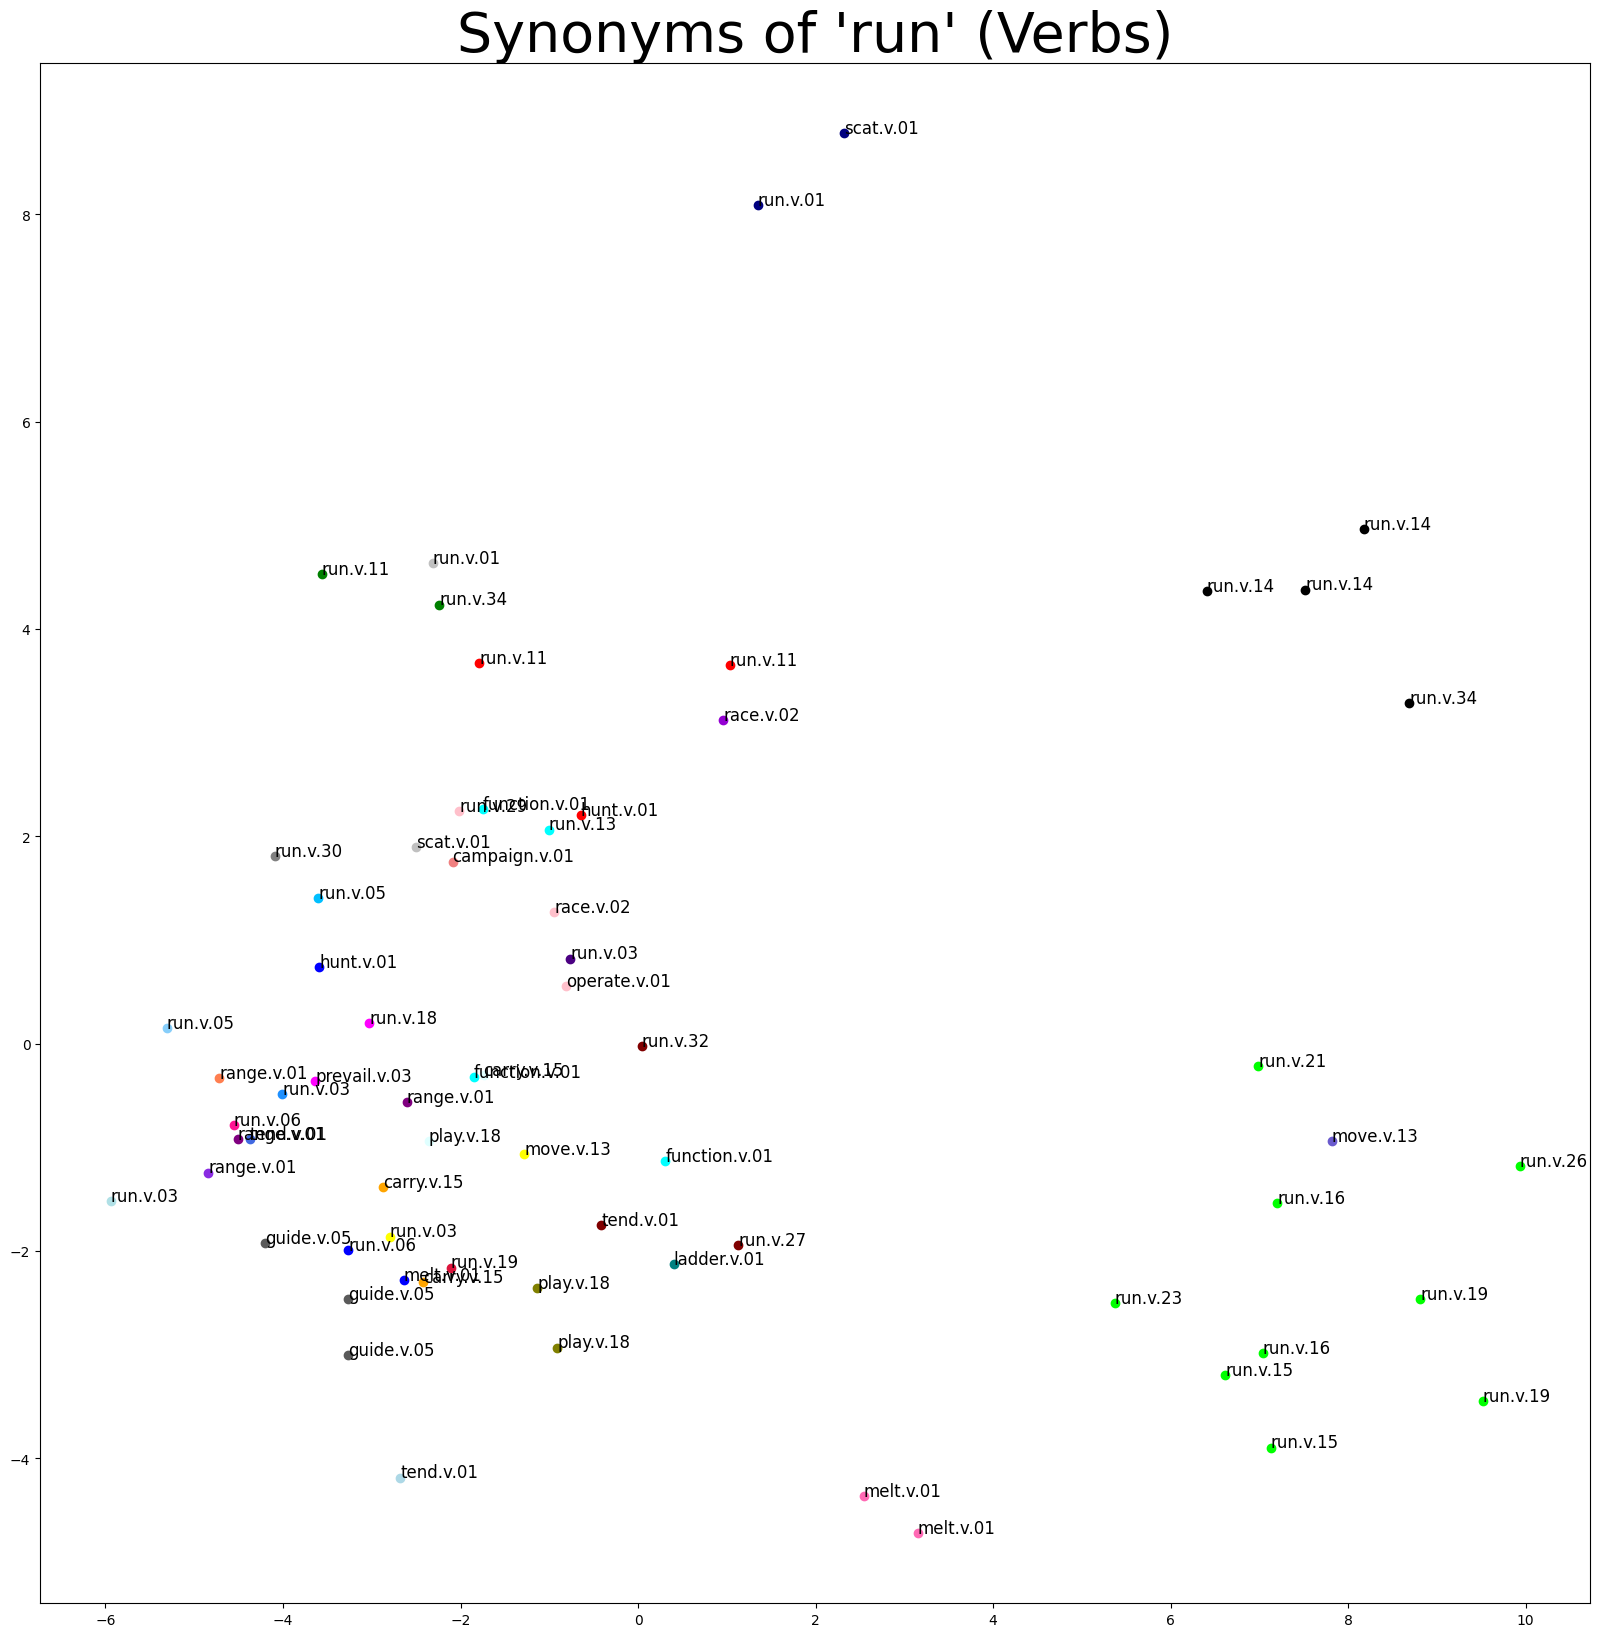

In [ ]:
#verbs
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(20, 20))
for i in range(len(filtered_labels_verbs)):
    x = filtered_labels_verbs[i][0].values
    y = filtered_labels_verbs[i][1].values
    label = filtered_labels_verbs[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Synonyms of 'run' (Verbs)", fontsize = 40)
plt.show()

#Hyponyms of run.v.01

In [ ]:
wn.synset('run.v.01').hyponyms()

[Synset('hare.v.01'),
 Synset('jog.v.03'),
 Synset('lope.v.01'),
 Synset('outrun.v.01'),
 Synset('romp.v.02'),
 Synset('run.v.33'),
 Synset('run_bases.v.01'),
 Synset('rush.v.05'),
 Synset('scurry.v.01'),
 Synset('sprint.v.01'),
 Synset('streak.v.02'),
 Synset('trot.v.01')]

In [ ]:
hyponyms_sentences = []

In [ ]:
wn.synset('run.v.01').examples()

["Don't run--you'll be out of breath", 'The children ran to the store']

In [ ]:
hyponyms_sentences.append((wn.synset('run.v.01').examples()[0], 'run.v.01'))
hyponyms_sentences.append((wn.synset('run.v.01').examples()[1], 'run.v.01'))
hyponyms_sentences.append((wn.synset('hare.v.01').examples()[0], 'hare.v.01'))

In [ ]:
hyponyms_sentences

[("Don't run--you'll be out of breath", 'run.v.01'),
 ('The children ran to the store', 'run.v.01'),
 ('He hared down the hill', 'hare.v.01')]

In [ ]:
hyponyms_tuples = []

In [ ]:
hyponyms = ['run', 'ran', 'hare', 'jog', 'outran', 'scurried']

In [ ]:
for index, sentence in enumerate(hyponyms_sentences):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']
  print(tokens)

  for w in hyponyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        print(word_index)
        print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  hyponyms_tuples.append(new_tuple)

['[CLS]', 'don', "'", 't', 'run', '-', '-', 'you', "'", 'll', 'be', 'out', 'of', 'breath', '[SEP]']
4

['[CLS]', 'the', 'children', 'ran', 'to', 'the', 'store', '[SEP]']
3

['[CLS]', 'he', 'hare', '##d', 'down', 'the', 'hill', '[SEP]']
2



In [ ]:
print(wn.synset('jog.v.03').examples()[0])
print(wn.synset('outrun.v.01').examples()[0])
print(wn.synset('scurry.v.01').examples()[0])

jog along the canal
in this race, I managed to outran everybody else
so terrified by the extraordinary ebbing of the sea that they scurried to higher ground


In [ ]:
jog = (wn.synset('jog.v.03').examples()[0], 'jog.v.03')
outrun = (wn.synset('outrun.v.01').examples()[0], 'outrun.v.01')
scurry = (wn.synset('scurry.v.01').examples()[0], 'scurry.v.01')

In [ ]:
#get embedding for jog
tokens = tokenizer.tokenize(jog[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][1].detach().numpy() + last_hidden_state[0][2].detach().numpy()) / 2
new_tuple = (jog[1], jog[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'jo', '##g', 'along', 'the', 'canal', '[SEP]']


In [ ]:
#get embedding for outrun
tokens = tokenizer.tokenize(outrun[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][8].detach().numpy() + last_hidden_state[0][9].detach().numpy()) / 2
new_tuple = (outrun[1], outrun[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'in', 'this', 'race', ',', 'i', 'managed', 'to', 'out', '##ran', 'everybody', 'else', '[SEP]']


In [ ]:
#get embedding for scurry
tokens = tokenizer.tokenize(scurry[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][13].detach().numpy() + last_hidden_state[0][14].detach().numpy() + last_hidden_state[0][15].detach().numpy()) / 3
new_tuple = (scurry[1], scurry[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'so', 'terrified', 'by', 'the', 'extraordinary', 'e', '##bbing', 'of', 'the', 'sea', 'that', 'they', 'sc', '##ur', '##ried', 'to', 'higher', 'ground', '[SEP]']


In [ ]:
num_clusters = 5

In [ ]:
cluster = AgglomerativeClustering(linkage='average',n_clusters=num_clusters).fit([t[2] for t in hyponyms_tuples]) 
cluster.labels_

array([3, 0, 4, 2, 1, 0])

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result = pca.fit_transform([t[2] for t in hyponyms_tuples])

In [ ]:
# creating a dataframe from the results
df = pd.DataFrame(result, [t[1] for t in hyponyms_tuples])

In [ ]:
df['Cluster'] = cluster.labels_

In [ ]:
df['Synset'] = [t[0] for t in hyponyms_tuples]

In [ ]:
df

,0,1,Cluster,Synset
Don't run--you'll be out of breath,-6.169716,8.597461,3,run.v.01
The children ran to the store,1.098801,0.898306,0,run.v.01
He hared down the hill,-3.736705,-5.355348,4,hare.v.01
jog along the canal,-3.931670,-5.766765,2,jog.v.03
"in this race, I managed to outran everybody else",8.687380,0.600293,1,outrun.v.01
so terrified by the extraordinary ebbing of the sea that they scurried to higher ground,4.051910,1.026054,0,scurry.v.01


In [ ]:
#separates each cluster label into filtered labels
filtered_labels = {}
for i in range(num_clusters):
    filtered_labels[i] = df[df["Cluster"] == i]

In [ ]:
#example of filtered labels grouped
filtered_labels[0]

,0,1,Cluster,Synset
The children ran to the store,1.098801,0.898306,0,run.v.01
so terrified by the extraordinary ebbing of the sea that they scurried to higher ground,4.051910,1.026054,0,scurry.v.01


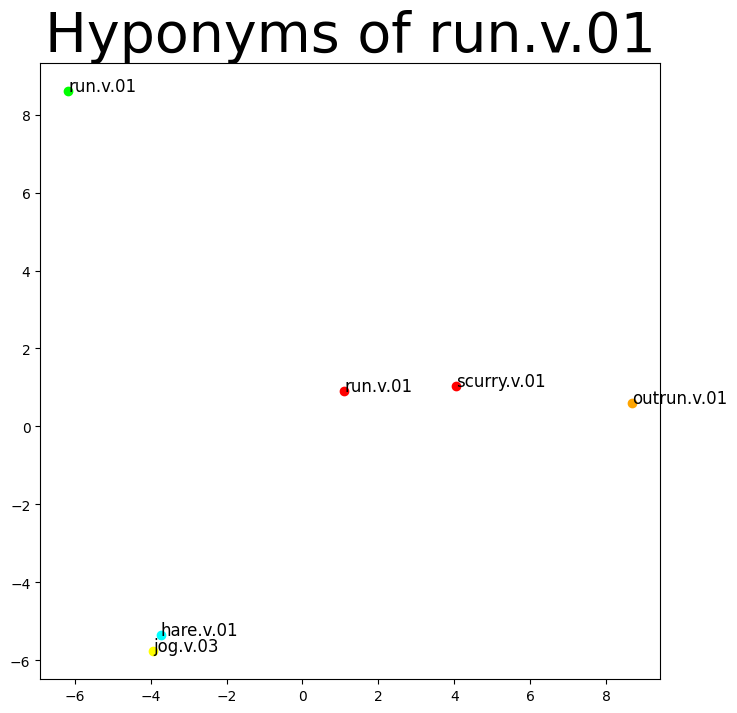

In [ ]:
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(8, 8))
for i in range(len(filtered_labels)):
    x = filtered_labels[i][0].values
    y = filtered_labels[i][1].values
    label = filtered_labels[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Hyponyms of run.v.01", fontsize = 40)
plt.show()

#Hyponyms of run.v.03

In [ ]:
wn.synset('run.v.03').hyponyms()

[Synset('come.v.09'), Synset('go_far.v.02'), Synset('radiate.v.03')]

In [ ]:
wn.synset('radiate.v.03').examples()

['spokes radiate from the hub of the wheel',
 'This plants radiate spines in all directions']

In [ ]:
hyponyms_sentences = []

In [ ]:
hyponyms_sentences.append((wn.synset('run.v.03').examples()[0], 'run.v.03'))
hyponyms_sentences.append((wn.synset('run.v.03').examples()[1], 'run.v.03'))
hyponyms_sentences.append((wn.synset('run.v.03').examples()[2], 'run.v.03'))
hyponyms_sentences.append((wn.synset('run.v.03').examples()[3], 'run.v.03'))
hyponyms_sentences.append((wn.synset('come.v.09').examples()[0], 'come.v.09'))
hyponyms_sentences.append((wn.synset('come.v.09').examples()[1], 'come.v.09'))
hyponyms_sentences.append((wn.synset('go_far.v.02').examples()[0], 'go_far.v.02'))

In [ ]:
hyponyms_sentences

[('Service runs all the way to Cranbury', 'run.v.03'),
 ("His knowledge doesn't go very far", 'run.v.03'),
 ('My memory extends back to my fourth year of life', 'run.v.03'),
 ('The facts extend beyond a consideration of her personal assets',
  'run.v.03'),
 ('The water came up to my waist', 'come.v.09'),
 ('The sleeves come to your knuckles', 'come.v.09'),
 ('His accomplishments go far', 'go_far.v.02')]

In [ ]:
hyponyms_tuples = []

In [ ]:
hyponyms = ['runs', 'go', 'extends', 'extend', 'came', 'come', 'go', 'radiate']

In [ ]:
for index, sentence in enumerate(hyponyms_sentences):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']

  for w in hyponyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  hyponyms_tuples.append(new_tuple)

In [ ]:
print(wn.synset('radiate.v.03').examples()[0])
print(wn.synset('radiate.v.03').examples()[1])

spokes radiate from the hub of the wheel
This plants radiate spines in all directions


In [ ]:
radiate1 = (wn.synset('radiate.v.03').examples()[0], 'radiate.v.03')
radiate2 = (wn.synset('radiate.v.03').examples()[1], 'radiate.v.03')

In [ ]:
#get embedding for radiate1
tokens = tokenizer.tokenize(radiate1[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][3].detach().numpy() + last_hidden_state[0][4].detach().numpy() + last_hidden_state[0][5].detach().numpy()) / 3
new_tuple = (radiate1[1], radiate1[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'spoke', '##s', 'ra', '##dia', '##te', 'from', 'the', 'hub', 'of', 'the', 'wheel', '[SEP]']


In [ ]:
#get embedding for radiate2
tokens = tokenizer.tokenize(radiate2[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][3].detach().numpy() + last_hidden_state[0][4].detach().numpy() + last_hidden_state[0][5].detach().numpy()) / 3
new_tuple = (radiate2[1], radiate2[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'this', 'plants', 'ra', '##dia', '##te', 'spines', 'in', 'all', 'directions', '[SEP]']


In [ ]:
num_clusters = 4

In [ ]:
cluster = AgglomerativeClustering(linkage='average',n_clusters=num_clusters).fit([t[2] for t in hyponyms_tuples]) 
cluster.labels_

array([3, 2, 1, 2, 0, 0, 2, 0, 0])

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result = pca.fit_transform([t[2] for t in hyponyms_tuples])

In [ ]:
# creating a dataframe from the results
df = pd.DataFrame(result, [t[1] for t in hyponyms_tuples])

In [ ]:
df['Cluster'] = cluster.labels_

In [ ]:
df['Synset'] = [t[0] for t in hyponyms_tuples]

In [ ]:
df

,0,1,Cluster,Synset
Service runs all the way to Cranbury,0.143014,12.305135,3,run.v.03
His knowledge doesn't go very far,-2.371367,-2.898014,2,run.v.03
My memory extends back to my fourth year of life,-4.801030,-0.914159,1,run.v.03
The facts extend beyond a consideration of her personal assets,-5.603828,-1.996128,2,run.v.03
The water came up to my waist,7.462692,-3.239643,0,come.v.09
The sleeves come to your knuckles,4.238322,-2.905946,0,come.v.09
His accomplishments go far,-5.858020,-1.478532,2,go_far.v.02
spokes radiate from the hub of the wheel,3.001079,0.820798,0,radiate.v.03
This plants radiate spines in all directions,3.789139,0.306489,0,radiate.v.03


In [ ]:
#separates each cluster label into filtered labels
filtered_labels = {}
for i in range(num_clusters):
    filtered_labels[i] = df[df["Cluster"] == i]

In [ ]:
#example of filtered labels grouped
filtered_labels[0]

,0,1,Cluster,Synset
The water came up to my waist,7.462692,-3.239643,0,come.v.09
The sleeves come to your knuckles,4.238322,-2.905946,0,come.v.09
spokes radiate from the hub of the wheel,3.001079,0.820798,0,radiate.v.03
This plants radiate spines in all directions,3.789139,0.306489,0,radiate.v.03


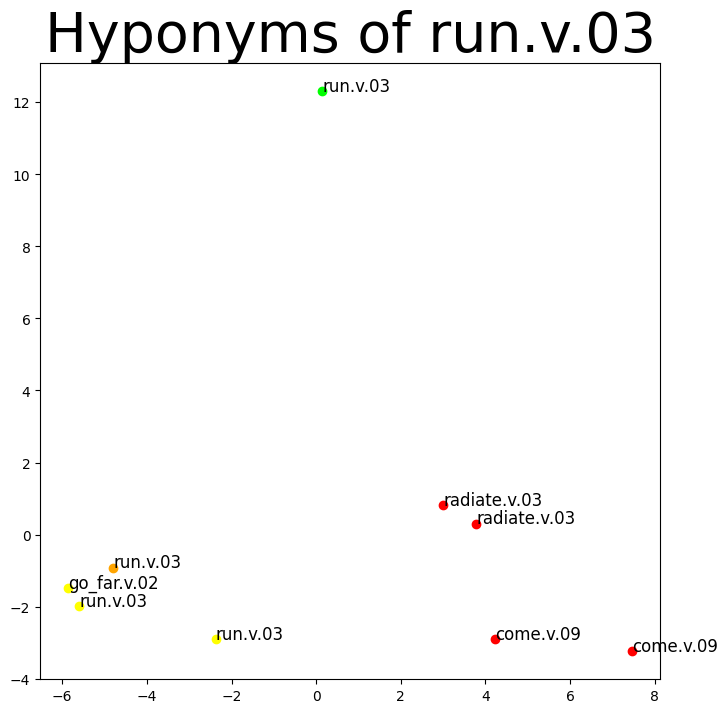

In [ ]:
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(8, 8))
for i in range(len(filtered_labels)):
    x = filtered_labels[i][0].values
    y = filtered_labels[i][1].values
    label = filtered_labels[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Hyponyms of run.v.03", fontsize = 40)
plt.show()

#Synonyms of Move

In [ ]:
wn.synsets('move')

[Synset('move.n.01'),
 Synset('move.n.02'),
 Synset('motion.n.03'),
 Synset('motion.n.06'),
 Synset('move.n.05'),
 Synset('travel.v.01'),
 Synset('move.v.02'),
 Synset('move.v.03'),
 Synset('move.v.04'),
 Synset('go.v.02'),
 Synset('be_active.v.01'),
 Synset('move.v.07'),
 Synset('act.v.01'),
 Synset('affect.v.05'),
 Synset('motivate.v.01'),
 Synset('move.v.11'),
 Synset('move.v.12'),
 Synset('move.v.13'),
 Synset('move.v.14'),
 Synset('move.v.15'),
 Synset('move.v.16')]

In [ ]:
wn.synonyms('move')

[[],
 ['relocation'],
 ['motility', 'motion', 'movement'],
 ['motion', 'movement'],
 [],
 ['go', 'locomote', 'travel'],
 ['displace'],
 [],
 [],
 ['go', 'proceed'],
 ['be_active'],
 [],
 ['act'],
 ['affect', 'impress', 'strike'],
 ['actuate', 'incite', 'motivate', 'prompt', 'propel'],
 [],
 [],
 ['go', 'run'],
 [],
 ['go'],
 ['make_a_motion']]

In [ ]:
wn.synset('move.n.01').examples()

["he didn't make a move to help", 'his first move was to hire a lawyer']

In [ ]:
#separate nouns and verbs
synonyms_sentences_nouns = []

In [ ]:
synonyms_sentences_verbs = []

In [ ]:
synonyms_sentences_nouns.append((wn.synset('move.n.01').examples()[0], 'move.n.01'))
synonyms_sentences_nouns.append((wn.synset('move.n.01').examples()[1], 'move.n.01'))
synonyms_sentences_nouns.append((wn.synset('move.n.02').examples()[0], 'move.n.02'))
synonyms_sentences_nouns.append((wn.synset('motion.n.03').examples()[0], 'motion.n.03'))
synonyms_sentences_nouns.append((wn.synset('motion.n.03').examples()[1], 'motion.n.03'))
synonyms_sentences_nouns.append((wn.synset('motion.n.03').examples()[2], 'motion.n.03'))
synonyms_sentences_nouns.append((wn.synset('motion.n.06').examples()[0], 'motion.n.06'))
synonyms_sentences_nouns.append((wn.synset('motion.n.06').examples()[1], 'motion.n.06'))
synonyms_sentences_nouns.append((wn.synset('motion.n.06').examples()[2], 'motion.n.06'))
#4 unique synsets

synonyms_sentences_verbs.append((wn.synset('travel.v.01').examples()[0], 'travel.v.01'))
synonyms_sentences_verbs.append((wn.synset('travel.v.01').examples()[1], 'travel.v.01'))
synonyms_sentences_verbs.append((wn.synset('travel.v.01').examples()[2], 'travel.v.01'))
synonyms_sentences_verbs.append((wn.synset('travel.v.01').examples()[3], 'travel.v.01'))
synonyms_sentences_verbs.append((wn.synset('travel.v.01').examples()[4], 'travel.v.01'))
synonyms_sentences_verbs.append((wn.synset('move.v.02').examples()[0], 'move.v.02'))
synonyms_sentences_verbs.append((wn.synset('move.v.02').examples()[1], 'move.v.02'))
synonyms_sentences_verbs.append((wn.synset('move.v.02').examples()[2], 'move.v.02'))
synonyms_sentences_verbs.append((wn.synset('move.v.03').examples()[0], 'move.v.03'))
synonyms_sentences_verbs.append((wn.synset('move.v.04').examples()[0], 'move.v.04'))
synonyms_sentences_verbs.append((wn.synset('move.v.04').examples()[1], 'move.v.04'))
synonyms_sentences_verbs.append((wn.synset('go.v.02').examples()[0], 'go.v.02'))
synonyms_sentences_verbs.append((wn.synset('go.v.02').examples()[1], 'go.v.02'))
synonyms_sentences_verbs.append((wn.synset('go.v.02').examples()[2], 'go.v.02'))
synonyms_sentences_verbs.append((wn.synset('go.v.02').examples()[3], 'go.v.02'))
synonyms_sentences_verbs.append((wn.synset('be_active.v.01').examples()[0], 'be_active.v.01'))
synonyms_sentences_verbs.append((wn.synset('move.v.07').examples()[0], 'move.v.07'))
synonyms_sentences_verbs.append((wn.synset('act.v.01').examples()[0], 'act.v.01'))
synonyms_sentences_verbs.append((wn.synset('act.v.01').examples()[1], 'act.v.01'))
synonyms_sentences_verbs.append((wn.synset('act.v.01').examples()[2], 'act.v.01'))
synonyms_sentences_verbs.append((wn.synset('act.v.01').examples()[3], 'act.v.01'))
synonyms_sentences_verbs.append((wn.synset('affect.v.05').examples()[0], 'affect.v.05'))
synonyms_sentences_verbs.append((wn.synset('affect.v.05').examples()[1], 'affect.v.05'))
synonyms_sentences_verbs.append((wn.synset('motivate.v.01').examples()[0], 'motivate.v.01'))
synonyms_sentences_verbs.append((wn.synset('move.v.11').examples()[0], 'move.v.11'))
synonyms_sentences_verbs.append((wn.synset('move.v.12').examples()[0], 'move.v.12'))
synonyms_sentences_verbs.append((wn.synset('move.v.13').examples()[0], 'move.v.13'))
synonyms_sentences_verbs.append((wn.synset('move.v.13').examples()[1], 'move.v.13'))
synonyms_sentences_verbs.append((wn.synset('move.v.14').examples()[0], 'move.v.14'))
synonyms_sentences_verbs.append((wn.synset('move.v.15').examples()[0], 'move.v.15'))
#15 unique synsets

In [ ]:
synonyms_sentences_nouns

[("he didn't make a move to help", 'move.n.01'),
 ('his first move was to hire a lawyer', 'move.n.01'),
 ('they say that three moves equal one fire', 'move.n.02'),
 ('the reflex motion of his eyebrows revealed his surprise', 'motion.n.03'),
 ('movement is a sign of life', 'motion.n.03'),
 ('an impatient move of his hand', 'motion.n.03'),
 ('police controlled the motion of the crowd', 'motion.n.06'),
 ('the movement of people from the farms to the cities', 'motion.n.06'),
 ('his move put him directly in my path', 'motion.n.06')]

In [ ]:
synonyms_sentences_verbs

[('How fast does your new car go?', 'travel.v.01'),
 ('We travelled from Rome to Naples by bus', 'travel.v.01'),
 ('The policemen went from door to door looking for the suspect',
  'travel.v.01'),
 ('The soldiers moved towards the city in an attempt to take it before night fell',
  'travel.v.01'),
 ('news travelled fast', 'travel.v.01'),
 ('Move those boxes into the corner, please', 'move.v.02'),
 ("I'm moving my money to another bank", 'move.v.02'),
 ('The director moved more responsibilities onto his new assistant',
  'move.v.02'),
 ('He moved his hand slightly to the right', 'move.v.03'),
 ('We moved from Idaho to Nebraska', 'move.v.04'),
 ('The basketball player moved from one team to another', 'move.v.04'),
 ('We should go farther in this matter', 'go.v.02'),
 ('She went through a lot of trouble', 'go.v.02'),
 ('go about the world in a certain manner', 'go.v.02'),
 ('Messages must go through diplomatic channels', 'go.v.02'),
 ('she is always moving', 'be_active.v.01'),
 ('the deba

In [ ]:
synonyms_tuples_nouns = []

In [ ]:
synonyms_tuples_verbs = []

In [ ]:
synonyms = ['move', 'moves', 'moved', 'moving', 'motion', 'movement', 'go', 'travelled', 'went', 'act', 'acted', 'impressed', 'struck', 'run']

In [ ]:
for index, sentence in enumerate(synonyms_sentences_nouns):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']

  #short example of tokens
  if index < 5:
    print(tokens)

  #this looks for our word of interest in each list of tokens and gets the index of it, for use in last_hidden_state[0][index] later
  for w in synonyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        #short example of word_index stored
        if index < 5:
          print(word_index)
          print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  synonyms_tuples_nouns.append(new_tuple)

['[CLS]', 'he', 'didn', "'", 't', 'make', 'a', 'move', 'to', 'help', '[SEP]']
7

['[CLS]', 'his', 'first', 'move', 'was', 'to', 'hire', 'a', 'lawyer', '[SEP]']
3

['[CLS]', 'they', 'say', 'that', 'three', 'moves', 'equal', 'one', 'fire', '[SEP]']
5

['[CLS]', 'the', 'reflex', 'motion', 'of', 'his', 'eyebrows', 'revealed', 'his', 'surprise', '[SEP]']
3

['[CLS]', 'movement', 'is', 'a', 'sign', 'of', 'life', '[SEP]']
1



In [ ]:
for index, sentence in enumerate(synonyms_sentences_verbs):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']

  #short example of tokens
  if index < 5:
    print(tokens)

  #this looks for our word of interest in each list of tokens and gets the index of it, for use in last_hidden_state[0][index] later
  for w in synonyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        #short example of word_index stored
        if index < 5:
          print(word_index)
          print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  synonyms_tuples_verbs.append(new_tuple)

['[CLS]', 'how', 'fast', 'does', 'your', 'new', 'car', 'go', '?', '[SEP]']
7

['[CLS]', 'we', 'travelled', 'from', 'rome', 'to', 'naples', 'by', 'bus', '[SEP]']
2

['[CLS]', 'the', 'policemen', 'went', 'from', 'door', 'to', 'door', 'looking', 'for', 'the', 'suspect', '[SEP]']
3

['[CLS]', 'the', 'soldiers', 'moved', 'towards', 'the', 'city', 'in', 'an', 'attempt', 'to', 'take', 'it', 'before', 'night', 'fell', '[SEP]']
3

['[CLS]', 'news', 'travelled', 'fast', '[SEP]']
2



In [ ]:
num_clusters_nouns = 4
num_clusters_verbs = 15

In [ ]:
cluster_nouns = AgglomerativeClustering(linkage='average',n_clusters=num_clusters_nouns).fit([t[2] for t in synonyms_tuples_nouns]) 
cluster_nouns.labels_

array([2, 0, 3, 0, 1, 0, 0, 0, 0])

In [ ]:
cluster_verbs = AgglomerativeClustering(linkage='average',n_clusters=num_clusters_verbs).fit([t[2] for t in synonyms_tuples_verbs]) 
cluster_verbs.labels_

array([ 3,  1,  1,  6,  1, 11,  2,  2,  2, 13,  2,  3, 12, 10,  3,  5,  2,
        5,  6, 14,  9,  7,  7,  0,  0,  2,  3,  8,  0,  4])

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result_nouns = pca.fit_transform([t[2] for t in synonyms_tuples_nouns])
result_verbs = pca.fit_transform([t[2] for t in synonyms_tuples_verbs])

In [ ]:
# creating a dataframe from the results
df_nouns = pd.DataFrame(result_nouns, [t[1] for t in synonyms_tuples_nouns])
df_verbs = pd.DataFrame(result_verbs, [t[1] for t in synonyms_tuples_verbs])

In [ ]:
df_nouns['Cluster'] = cluster_nouns.labels_
df_verbs['Cluster'] = cluster_verbs.labels_

In [ ]:
df_nouns['Synset'] = [t[0] for t in synonyms_tuples_nouns]
df_verbs['Synset'] = [t[0] for t in synonyms_tuples_verbs]

In [ ]:
df_nouns

,0,1,Cluster,Synset
he didn't make a move to help,-7.882023,8.617040,2,move.n.01
his first move was to hire a lawyer,-0.174142,-1.362312,0,move.n.01
they say that three moves equal one fire,0.100470,-1.958434,3,move.n.02
the reflex motion of his eyebrows revealed his surprise,-1.779514,-4.169044,0,motion.n.03
movement is a sign of life,13.402518,5.133657,1,motion.n.03
an impatient move of his hand,-2.639442,-0.774822,0,motion.n.03
police controlled the motion of the crowd,1.082189,-3.965884,0,motion.n.06
the movement of people from the farms to the cities,0.526479,-3.194701,0,motion.n.06
his move put him directly in my path,-2.636533,1.674499,0,motion.n.06


In [ ]:
df_verbs

,0,1,Cluster,Synset
How fast does your new car go?,1.567041,-4.297863,3,travel.v.01
We travelled from Rome to Naples by bus,-2.133338,-0.892349,1,travel.v.01
The policemen went from door to door looking for the suspect,-2.221224,-1.012032,1,travel.v.01
The soldiers moved towards the city in an attempt to take it before night fell,-3.537263,-0.586016,6,travel.v.01
news travelled fast,-3.768644,-1.356516,1,travel.v.01
"Move those boxes into the corner, please",7.650343,0.687521,11,move.v.02
I'm moving my money to another bank,-1.534844,-1.779292,2,move.v.02
The director moved more responsibilities onto his new assistant,-3.030236,-1.378701,2,move.v.02
He moved his hand slightly to the right,-2.241569,1.436586,2,move.v.03
We moved from Idaho to Nebraska,-2.309982,-3.156563,13,move.v.04


In [ ]:
#separates each cluster label into filtered labels
filtered_labels_nouns = {}
for i in range(num_clusters_nouns):
    filtered_labels_nouns[i] = df_nouns[df_nouns["Cluster"] == i]

filtered_labels_verbs = {}
for i in range(num_clusters_verbs):
    filtered_labels_verbs[i] = df_verbs[df_verbs["Cluster"] == i]

In [ ]:
filtered_labels_nouns[0]

,0,1,Cluster,Synset
his first move was to hire a lawyer,-0.174142,-1.362312,0,move.n.01
the reflex motion of his eyebrows revealed his surprise,-1.779514,-4.169044,0,motion.n.03
an impatient move of his hand,-2.639442,-0.774822,0,motion.n.03
police controlled the motion of the crowd,1.082189,-3.965884,0,motion.n.06
the movement of people from the farms to the cities,0.526479,-3.194701,0,motion.n.06
his move put him directly in my path,-2.636533,1.674499,0,motion.n.06


In [ ]:
filtered_labels_verbs[0]

,0,1,Cluster,Synset
This moved me to sacrifice my career,-1.499387,3.090502,0,motivate.v.01
Her fate moved us all,-3.677574,1.222797,0,move.v.11
she moves in certain circles only,-2.077994,0.467089,0,move.v.14


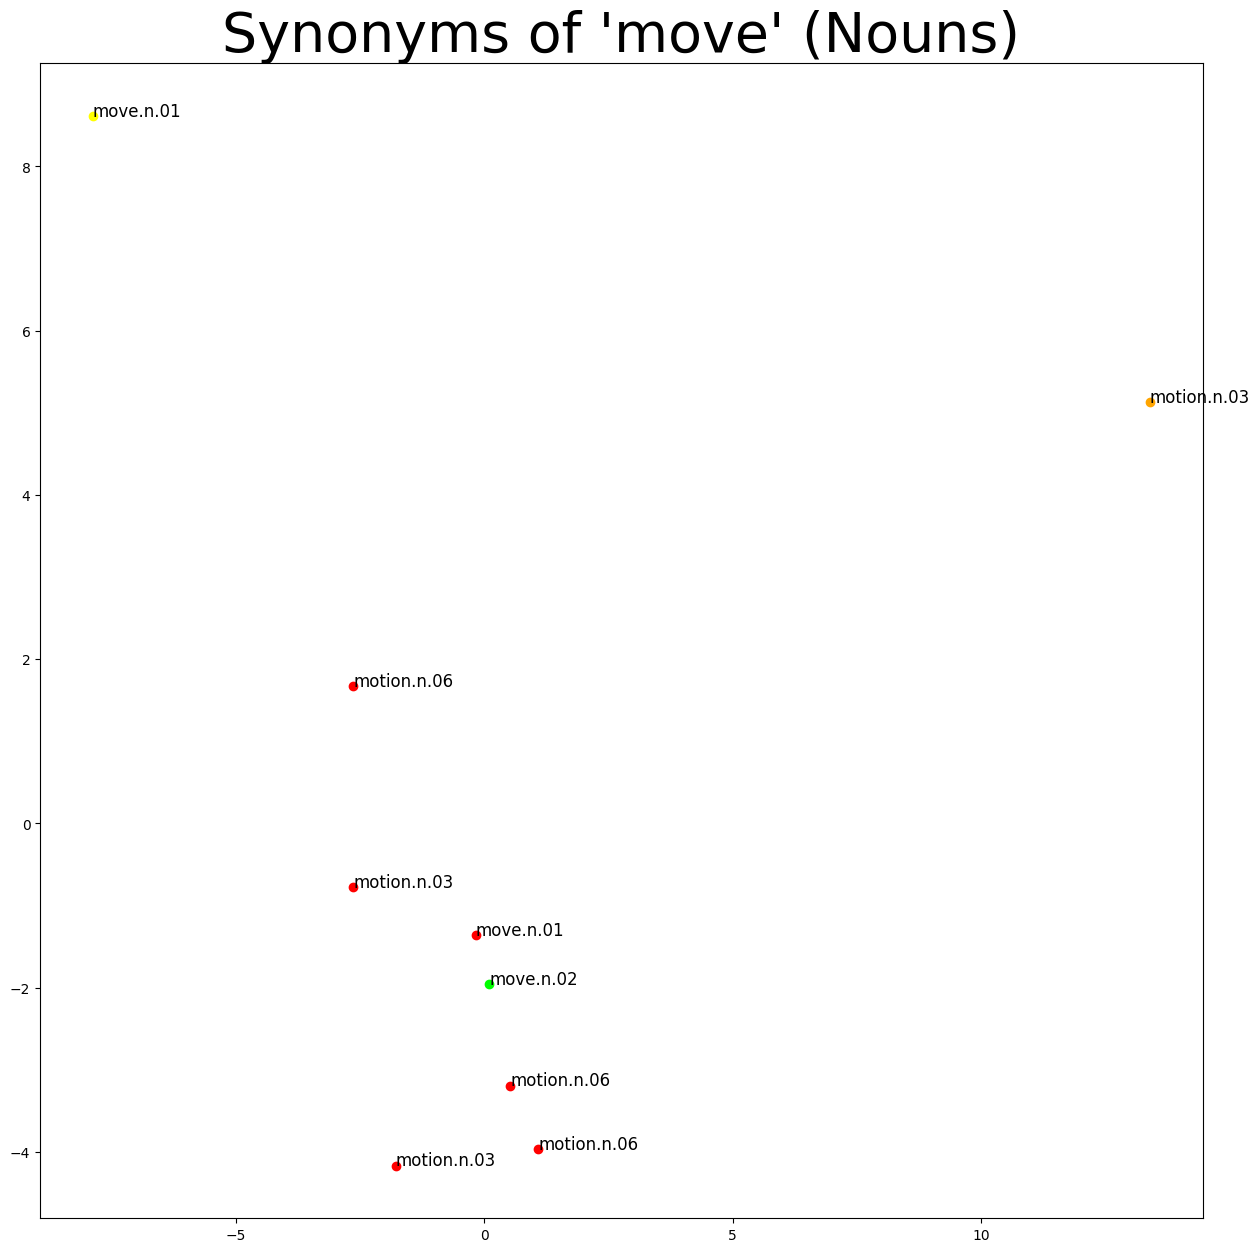

In [ ]:
#nouns
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

plt.figure(figsize=(15, 15))
for i in range(len(filtered_labels_nouns)):
    x = filtered_labels_nouns[i][0].values
    y = filtered_labels_nouns[i][1].values
    label = filtered_labels_nouns[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Synonyms of 'move' (Nouns)", fontsize = 40)
plt.show()

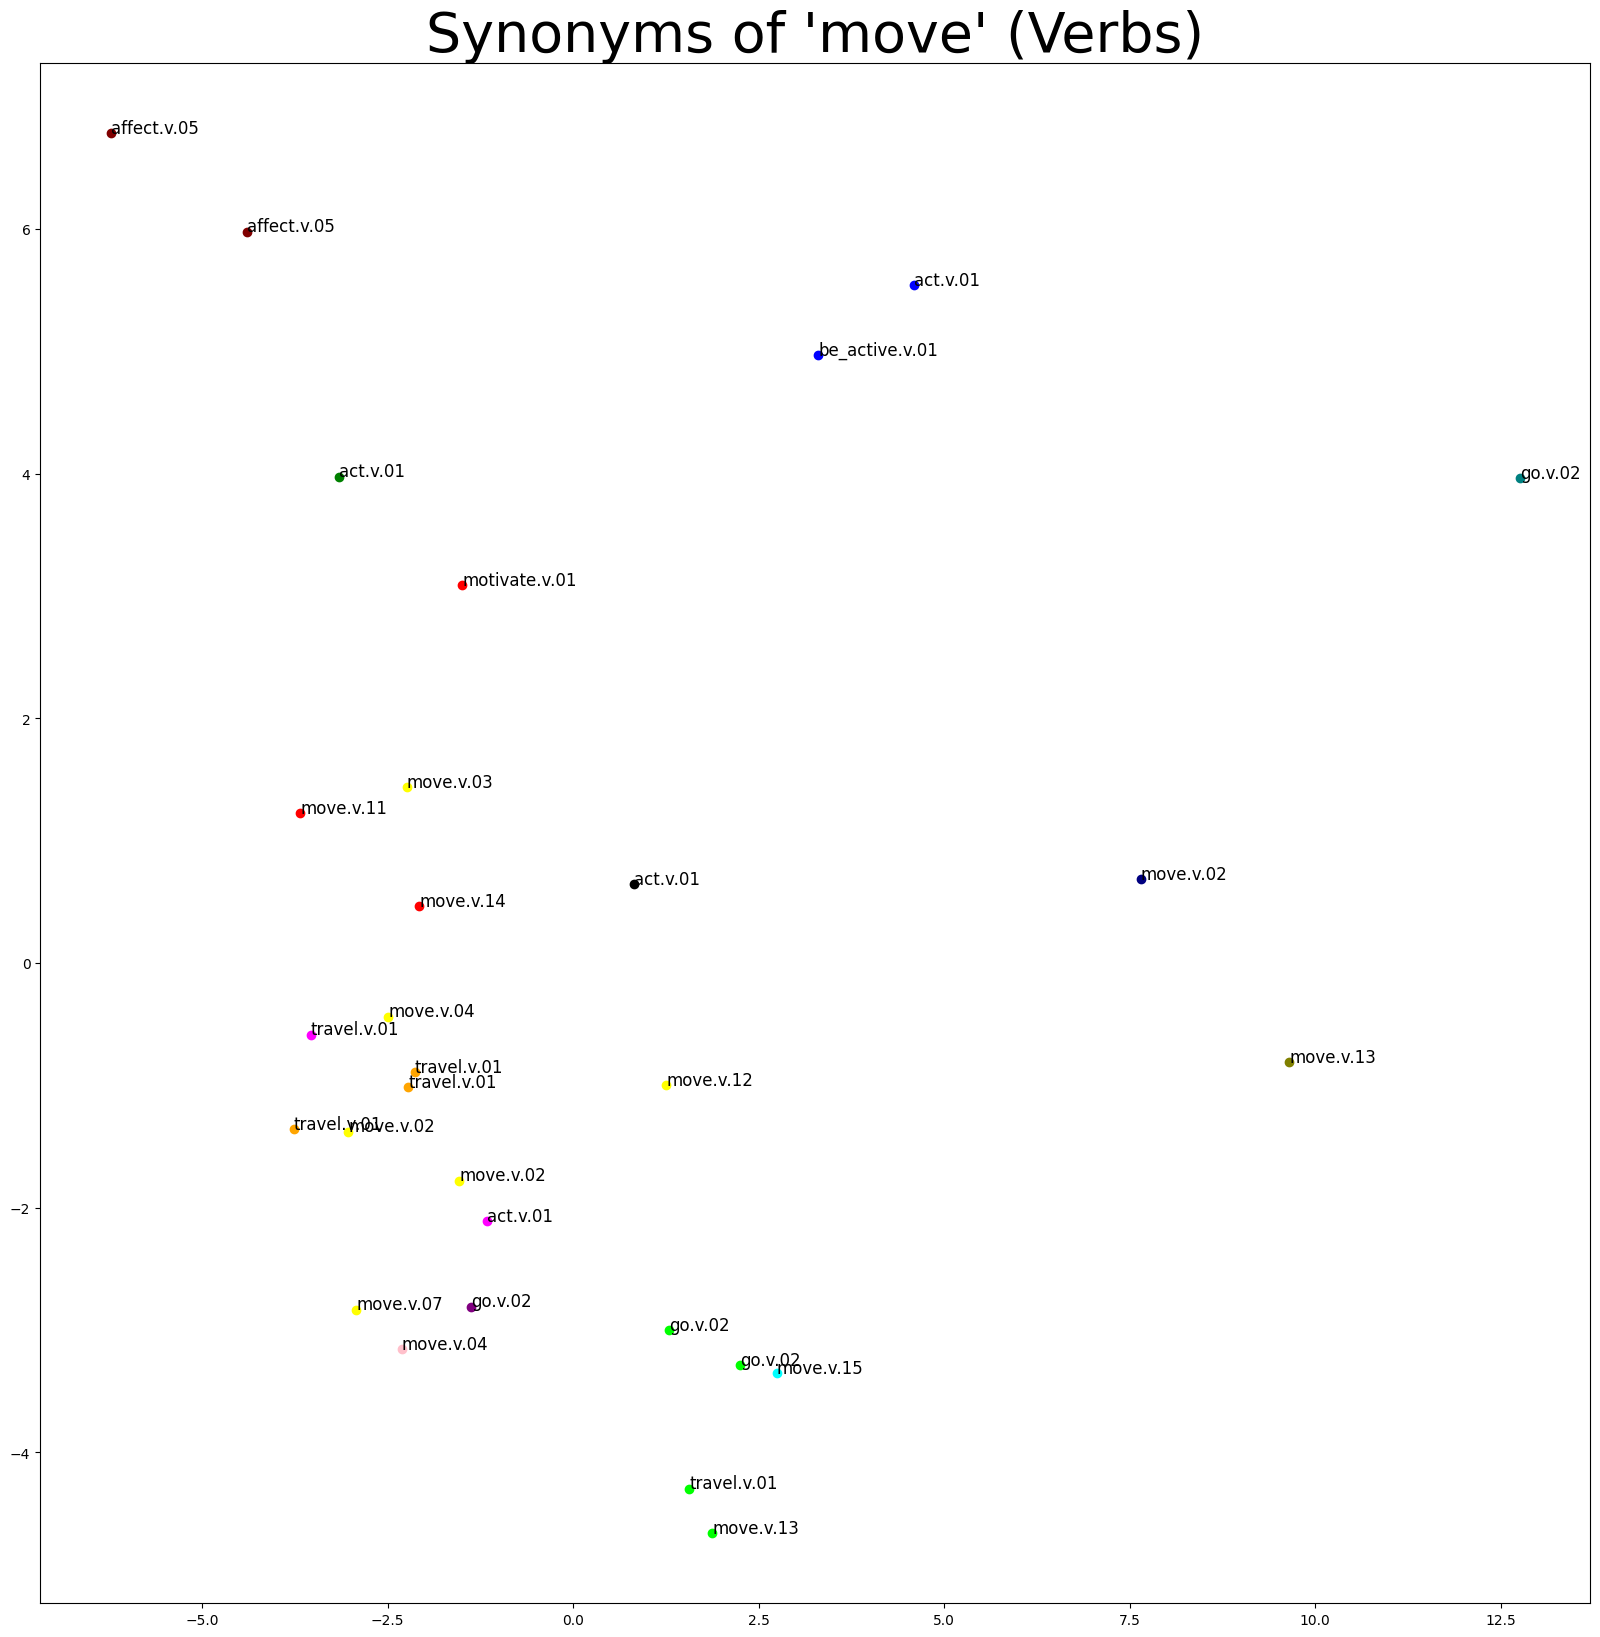

In [ ]:
#verbs
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

plt.figure(figsize=(20, 20))
for i in range(len(filtered_labels_verbs)):
    x = filtered_labels_verbs[i][0].values
    y = filtered_labels_verbs[i][1].values
    label = filtered_labels_verbs[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Synonyms of 'move' (Verbs)", fontsize = 40)
plt.show()

#Hyponyms of travel.v.01

In [ ]:
#wn.synset('travel.v.01').hyponyms()

In [ ]:
hyponyms_sentences = []

In [ ]:
wn.synset('walk.v.01').examples()

["Walk, don't run!",
 'We walked instead of driving',
 'She walks with a slight limp',
 'The patient cannot walk yet',
 'Walk over to the cabinet']

In [ ]:
hyponyms_sentences.append((wn.synset('travel.v.01').examples()[0], 'travel.v.01'))
hyponyms_sentences.append((wn.synset('travel.v.01').examples()[1], 'travel.v.01'))
hyponyms_sentences.append((wn.synset('travel.v.01').examples()[2], 'travel.v.01'))
hyponyms_sentences.append((wn.synset('travel.v.01').examples()[3], 'travel.v.01'))
hyponyms_sentences.append((wn.synset('travel.v.01').examples()[4], 'travel.v.01'))

hyponyms_sentences.append((wn.synset('go_around.v.02').examples()[0], 'go_around.v.02'))
hyponyms_sentences.append((wn.synset('go_around.v.02').examples()[1], 'go_around.v.02'))

hyponyms_sentences.append((wn.synset('come.v.01').examples()[0], 'come.v.01'))
hyponyms_sentences.append((wn.synset('come.v.01').examples()[1], 'come.v.01'))
hyponyms_sentences.append((wn.synset('come.v.01').examples()[2], 'come.v.01'))
hyponyms_sentences.append((wn.synset('come.v.01').examples()[3], 'come.v.01'))
hyponyms_sentences.append((wn.synset('come.v.01').examples()[4], 'come.v.01'))

hyponyms_sentences.append((wn.synset('walk.v.10').examples()[0], 'walk.v.10'))
hyponyms_sentences.append((wn.synset('walk.v.10').examples()[1], 'walk.v.10'))

hyponyms_sentences.append((wn.synset('weave.v.04').examples()[0], 'weave.v.04'))
hyponyms_sentences.append((wn.synset('weave.v.04').examples()[2], 'weave.v.04'))

hyponyms_sentences.append((wn.synset('do.v.13').examples()[0], 'do.v.13'))
hyponyms_sentences.append((wn.synset('do.v.13').examples()[1], 'do.v.13'))

hyponyms_sentences.append((wn.synset('walk.v.01').examples()[0], 'walk.v.01'))
hyponyms_sentences.append((wn.synset('walk.v.01').examples()[1], 'walk.v.01'))
hyponyms_sentences.append((wn.synset('walk.v.01').examples()[2], 'walk.v.01'))
hyponyms_sentences.append((wn.synset('walk.v.01').examples()[3], 'walk.v.01'))
hyponyms_sentences.append((wn.synset('walk.v.01').examples()[4], 'walk.v.01'))

In [ ]:
hyponyms_sentences

[('How fast does your new car go?', 'travel.v.01'),
 ('We travelled from Rome to Naples by bus', 'travel.v.01'),
 ('The policemen went from door to door looking for the suspect',
  'travel.v.01'),
 ('The soldiers moved towards the city in an attempt to take it before night fell',
  'travel.v.01'),
 ('news travelled fast', 'travel.v.01'),
 ('the rumor spread', 'go_around.v.02'),
 ('the story went around in the office', 'go_around.v.02'),
 ('He came singing down the road', 'come.v.01'),
 ('Come with me to the Casbah', 'come.v.01'),
 ('come down here!', 'come.v.01'),
 ('come out of the closet!', 'come.v.01'),
 ('come into the room', 'come.v.01'),
 ('The lovers held hands while walking', 'walk.v.10'),
 ('We like to walk every Sunday', 'walk.v.10'),
 ('the river winds through the hills', 'weave.v.04'),
 ('sometimes, the gout wanders through the entire body', 'weave.v.04'),
 ('This car does 150 miles per hour', 'do.v.13'),
 ('We did 6 miles on our hike every day', 'do.v.13'),
 ("Walk, don't 

In [ ]:
hyponyms_tuples = []

In [ ]:
hyponyms = ['go', 'travelled', 'went', 'moved', 'spread', 'came', 'come', 'walking', 'walk', 'winds', 'meanders', 'wanders', 'does', 'did', 'walked', 'walks']

In [ ]:
for index, sentence in enumerate(hyponyms_sentences):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']
  print(tokens)

  for w in hyponyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        print(word_index)
        print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  hyponyms_tuples.append(new_tuple)

['[CLS]', 'how', 'fast', 'does', 'your', 'new', 'car', 'go', '?', '[SEP]']
7

3

['[CLS]', 'we', 'travelled', 'from', 'rome', 'to', 'naples', 'by', 'bus', '[SEP]']
2

['[CLS]', 'the', 'policemen', 'went', 'from', 'door', 'to', 'door', 'looking', 'for', 'the', 'suspect', '[SEP]']
3

['[CLS]', 'the', 'soldiers', 'moved', 'towards', 'the', 'city', 'in', 'an', 'attempt', 'to', 'take', 'it', 'before', 'night', 'fell', '[SEP]']
3

['[CLS]', 'news', 'travelled', 'fast', '[SEP]']
2

['[CLS]', 'the', 'rumor', 'spread', '[SEP]']
3

['[CLS]', 'the', 'story', 'went', 'around', 'in', 'the', 'office', '[SEP]']
3

['[CLS]', 'he', 'came', 'singing', 'down', 'the', 'road', '[SEP]']
2

['[CLS]', 'come', 'with', 'me', 'to', 'the', 'cas', '##bah', '[SEP]']
1

['[CLS]', 'come', 'down', 'here', '!', '[SEP]']
1

['[CLS]', 'come', 'out', 'of', 'the', 'closet', '!', '[SEP]']
1

['[CLS]', 'come', 'into', 'the', 'room', '[SEP]']
1

['[CLS]', 'the', 'lovers', 'held', 'hands', 'while', 'walking', '[SEP]']
6

['[CL

In [ ]:
meanders = (wn.synset('weave.v.04').examples()[1], 'weave.v.04')

In [ ]:
#get embedding for meanders
tokens = tokenizer.tokenize(meanders[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][3].detach().numpy() + last_hidden_state[0][4].detach().numpy()) / 2
new_tuple = (meanders[1], meanders[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'the', 'path', 'mean', '##ders', 'through', 'the', 'vineyards', '[SEP]']


In [ ]:
num_clusters = 7

In [ ]:
cluster = AgglomerativeClustering(linkage='average',n_clusters=num_clusters).fit([t[2] for t in hyponyms_tuples]) 
cluster.labels_

array([3, 0, 0, 0, 0, 1, 0, 6, 4, 4, 4, 4, 1, 0, 0, 5, 2, 0, 4, 0, 0, 0,
       4, 0])

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result = pca.fit_transform([t[2] for t in hyponyms_tuples])

In [ ]:
# creating a dataframe from the results
df = pd.DataFrame(result, [t[1] for t in hyponyms_tuples])

In [ ]:
df['Cluster'] = cluster.labels_

In [ ]:
df['Synset'] = [t[0] for t in hyponyms_tuples]

In [ ]:
df

,0,1,Cluster,Synset
How fast does your new car go?,-1.163293,6.719376,3,travel.v.01
We travelled from Rome to Naples by bus,-3.981259,-0.460832,0,travel.v.01
The policemen went from door to door looking for the suspect,-4.032194,2.151033,0,travel.v.01
The soldiers moved towards the city in an attempt to take it before night fell,-3.762328,0.385345,0,travel.v.01
news travelled fast,-5.480782,1.574248,0,travel.v.01
the rumor spread,-1.199975,-1.794238,1,go_around.v.02
the story went around in the office,-4.164556,4.848945,0,go_around.v.02
He came singing down the road,-2.293361,3.169635,6,come.v.01
Come with me to the Casbah,9.256453,2.089621,4,come.v.01
come down here!,12.055474,0.137598,4,come.v.01


In [ ]:
#separates each cluster label into filtered labels
filtered_labels = {}
for i in range(num_clusters):
    filtered_labels[i] = df[df["Cluster"] == i]

In [ ]:
filtered_labels[2]

,0,1,Cluster,Synset
This car does 150 miles per hour,-4.048625,3.357554,2,do.v.13


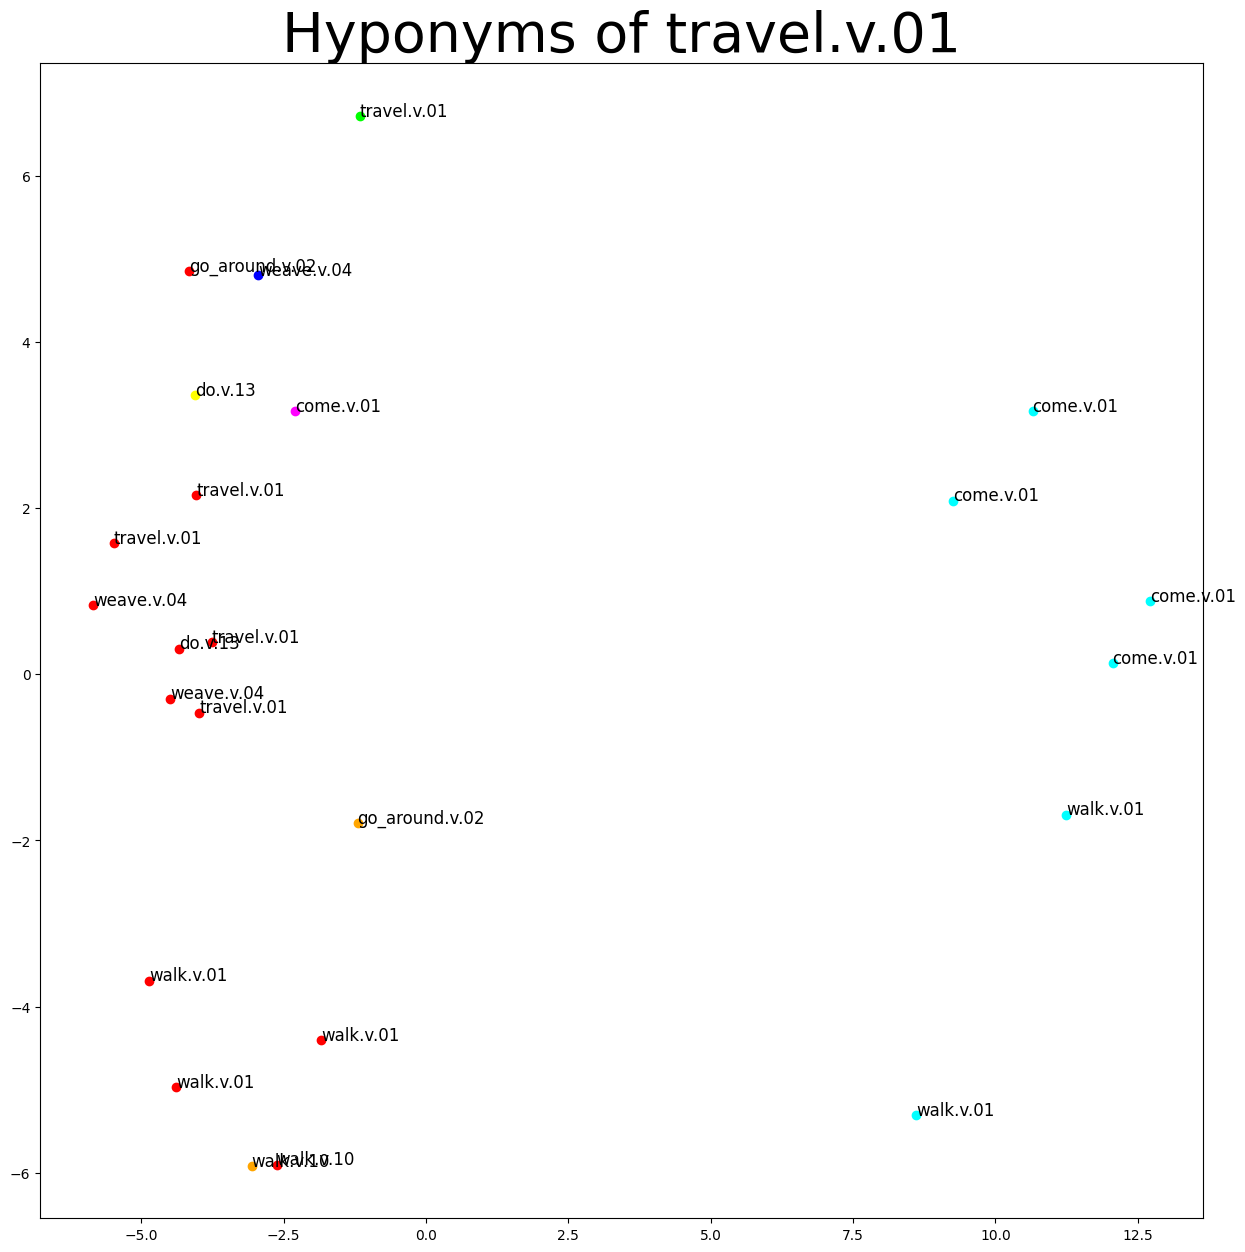

In [ ]:
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(15, 15))
for i in range(len(filtered_labels)):
    x = filtered_labels[i][0].values
    y = filtered_labels[i][1].values
    label = filtered_labels[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Hyponyms of travel.v.01", fontsize = 40)
plt.show()

#Hyponyms of Produce - Fruits and Vegetables

In [ ]:
wn.synsets('produce')

[Synset('produce.n.01'),
 Synset('produce.v.01'),
 Synset('produce.v.02'),
 Synset('produce.v.03'),
 Synset('produce.v.04'),
 Synset('grow.v.07'),
 Synset('produce.v.06'),
 Synset('grow.v.08')]

In [ ]:
wn.synset('produce.n.01').hyponyms()

[Synset('eater.n.02'), Synset('edible_fruit.n.01'), Synset('vegetable.n.01')]

In [ ]:
wn.synset('edible_fruit.n.01').hyponyms()

[Synset('ackee.n.01'),
 Synset('anchovy_pear.n.02'),
 Synset('apple.n.01'),
 Synset('apricot.n.02'),
 Synset('avocado.n.01'),
 Synset('banana.n.02'),
 Synset('barbados_gooseberry.n.02'),
 Synset('berry.n.01'),
 Synset('breadfruit.n.02'),
 Synset('canistel.n.02'),
 Synset('carambola.n.02'),
 Synset('carissa_plum.n.01'),
 Synset('ceriman.n.02'),
 Synset('cherry.n.03'),
 Synset('citrus.n.01'),
 Synset('cling.n.01'),
 Synset('cocoa_plum.n.02'),
 Synset('custard_apple.n.02'),
 Synset('date.n.08'),
 Synset('dried_fruit.n.01'),
 Synset('durian.n.02'),
 Synset('elderberry.n.02'),
 Synset('feijoa.n.02'),
 Synset('fig.n.04'),
 Synset('freestone.n.01'),
 Synset('garambulla.n.02'),
 Synset('genip.n.02'),
 Synset('genipap.n.01'),
 Synset('grape.n.01'),
 Synset('guava.n.03'),
 Synset('hog_plum.n.03'),
 Synset('hog_plum.n.04'),
 Synset('jaboticaba.n.02'),
 Synset('jackfruit.n.02'),
 Synset('jujube.n.02'),
 Synset('kai_apple.n.01'),
 Synset('ketembilla.n.02'),
 Synset('kiwi.n.03'),
 Synset('lanseh.n.0

In [ ]:
wn.synset('vegetable.n.01').hyponyms()

[Synset('artichoke.n.02'),
 Synset('artichoke_heart.n.01'),
 Synset('asparagus.n.02'),
 Synset('bamboo_shoot.n.01'),
 Synset('cardoon.n.02'),
 Synset('celery.n.02'),
 Synset('cruciferous_vegetable.n.01'),
 Synset('cucumber.n.02'),
 Synset('fennel.n.02'),
 Synset('greens.n.01'),
 Synset('gumbo.n.03'),
 Synset('julienne.n.01'),
 Synset('leek.n.02'),
 Synset('legume.n.03'),
 Synset('mushroom.n.05'),
 Synset('onion.n.03'),
 Synset('pieplant.n.01'),
 Synset('plantain.n.03'),
 Synset('potherb.n.01'),
 Synset('pumpkin.n.02'),
 Synset('raw_vegetable.n.01'),
 Synset('root_vegetable.n.01'),
 Synset('solanaceous_vegetable.n.01'),
 Synset('squash.n.02'),
 Synset('truffle.n.02')]

In [ ]:
hyponyms_sentences = []

In [ ]:
hyponyms_sentences.append(('We are growing peas in our garden this year', 'legume.n.03'))
hyponyms_sentences.append(("Salted peanuts were recently revealed as the nation's favourite snack.", 'legume.n.03'))
hyponyms_sentences.append(('The recipe calls for chopped onions.', 'onion.n.03'))
hyponyms_sentences.append(('He is growing onions in his garden this year.', 'onion.n.03'))
hyponyms_sentences.append(('The apples are ripe.', 'apple.n.01'))
hyponyms_sentences.append(('Some apples fell down from the tree.', 'apple.n.01'))
hyponyms_sentences.append(('One of the apples fell to the ground.', 'apple.n.01'))
hyponyms_sentences.append(('Quite a lot of rotten apples were in the basket.', 'apple.n.01'))
hyponyms_sentences.append(('The bananas have turned from yellow to brown.', 'banana.n.02'))
hyponyms_sentences.append(('A green banana is not ripe enough to eat.', 'banana.n.02'))

In [ ]:
hyponyms_sentences

[('We are growing peas in our garden this year', 'legume.n.03'),
 ("Salted peanuts were recently revealed as the nation's favourite snack.",
  'legume.n.03'),
 ('The recipe calls for chopped onions.', 'onion.n.03'),
 ('He is growing onions in his garden this year.', 'onion.n.03'),
 ('The apples are ripe.', 'apple.n.01'),
 ('Some apples fell down from the tree.', 'apple.n.01'),
 ('One of the apples fell to the ground.', 'apple.n.01'),
 ('Quite a lot of rotten apples were in the basket.', 'apple.n.01'),
 ('The bananas have turned from yellow to brown.', 'banana.n.02'),
 ('A green banana is not ripe enough to eat.', 'banana.n.02')]

In [ ]:
hyponyms_tuples = []

In [ ]:
hyponyms = ['peas', 'peanuts', 'chickpeas', 'lentils', 'cucumber', 'onions', 'apples', 'bananas', 'banana', 'nectarines']

In [ ]:
for index, sentence in enumerate(hyponyms_sentences):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']
  print(tokens)

  for w in hyponyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        print(word_index)
        print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  hyponyms_tuples.append(new_tuple)

['[CLS]', 'we', 'are', 'growing', 'peas', 'in', 'our', 'garden', 'this', 'year', '[SEP]']
4

['[CLS]', 'salt', '##ed', 'peanuts', 'were', 'recently', 'revealed', 'as', 'the', 'nation', "'", 's', 'favourite', 'snack', '.', '[SEP]']
3

['[CLS]', 'the', 'recipe', 'calls', 'for', 'chopped', 'onions', '.', '[SEP]']
6

['[CLS]', 'he', 'is', 'growing', 'onions', 'in', 'his', 'garden', 'this', 'year', '.', '[SEP]']
4

['[CLS]', 'the', 'apples', 'are', 'ripe', '.', '[SEP]']
2

['[CLS]', 'some', 'apples', 'fell', 'down', 'from', 'the', 'tree', '.', '[SEP]']
2

['[CLS]', 'one', 'of', 'the', 'apples', 'fell', 'to', 'the', 'ground', '.', '[SEP]']
4

['[CLS]', 'quite', 'a', 'lot', 'of', 'rotten', 'apples', 'were', 'in', 'the', 'basket', '.', '[SEP]']
6

['[CLS]', 'the', 'bananas', 'have', 'turned', 'from', 'yellow', 'to', 'brown', '.', '[SEP]']
2

['[CLS]', 'a', 'green', 'banana', 'is', 'not', 'ripe', 'enough', 'to', 'eat', '.', '[SEP]']
3



In [ ]:
chickpeas = ('Drain the chickpeas and set aside until ready to use.', 'legume.n.03')
lentils = ('In the evenings I help to cook dal, a meal made of lentils, over the fire.', 'legume.n.03')
cucumbers1 = ('We had a cold cucumber soup as a starter.', 'cucumber.n.03')
cucumbers2 = ('Peel the cucumber for that dish', 'cucumber.n.03')
nectarines = ('Nectarines are enjoyed raw, cooked, or dried. ', 'nectarine.n.02')

In [ ]:
#get embedding for chickpeas
tokens = tokenizer.tokenize(chickpeas[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][3].detach().numpy() + last_hidden_state[0][4].detach().numpy() + last_hidden_state[0][5].detach().numpy()) / 3
new_tuple = (chickpeas[1], chickpeas[0], embedding)
hyponyms_tuples.append(new_tuple)

In [ ]:
#get embedding for lentils
tokens = tokenizer.tokenize(lentils[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][14].detach().numpy() + last_hidden_state[0][15].detach().numpy()) / 2
new_tuple = (lentils[1], lentils[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'in', 'the', 'evenings', 'i', 'help', 'to', 'cook', 'dal', ',', 'a', 'meal', 'made', 'of', 'lent', '##ils', ',', 'over', 'the', 'fire', '.', '[SEP]']


In [ ]:
#get embedding for cucumbers1
tokens = tokenizer.tokenize(cucumbers1[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][5].detach().numpy() + last_hidden_state[0][6].detach().numpy() + last_hidden_state[0][7].detach().numpy()) / 3
new_tuple = (cucumbers1[1], cucumbers1[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'we', 'had', 'a', 'cold', 'cu', '##cum', '##ber', 'soup', 'as', 'a', 'starter', '.', '[SEP]']


In [ ]:
#get embedding for cucumbers2
tokens = tokenizer.tokenize(cucumbers2[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][3].detach().numpy() + last_hidden_state[0][4].detach().numpy() + last_hidden_state[0][5].detach().numpy()) / 3
new_tuple = (cucumbers2[1], cucumbers2[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'peel', 'the', 'cu', '##cum', '##ber', 'for', 'that', 'dish', '[SEP]']


In [ ]:
#get embedding for nectarines
tokens = tokenizer.tokenize(nectarines[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][1].detach().numpy() + last_hidden_state[0][2].detach().numpy()) / 2
new_tuple = (nectarines[1], nectarines[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'nectar', '##ines', 'are', 'enjoyed', 'raw', ',', 'cooked', ',', 'or', 'dried', '.', '[SEP]']


In [ ]:
num_clusters = 6

In [ ]:
cluster = AgglomerativeClustering(linkage='average',n_clusters=num_clusters).fit([t[2] for t in hyponyms_tuples]) 
cluster.labels_

array([0, 5, 0, 0, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1, 2])

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result = pca.fit_transform([t[2] for t in hyponyms_tuples])

In [ ]:
# creating a dataframe from the results
df = pd.DataFrame(result, [t[1] for t in hyponyms_tuples])

In [ ]:
df['Cluster'] = cluster.labels_

In [ ]:
df['Synset'] = [t[0] for t in hyponyms_tuples]

In [ ]:
df

,0,1,Cluster,Synset
We are growing peas in our garden this year,0.511892,6.119572,0,legume.n.03
Salted peanuts were recently revealed as the nation's favourite snack.,-0.273161,3.079348,5,legume.n.03
The recipe calls for chopped onions.,1.704040,6.907667,0,onion.n.03
He is growing onions in his garden this year.,-0.284283,8.178500,0,onion.n.03
The apples are ripe.,-6.311795,-2.993876,4,apple.n.01
Some apples fell down from the tree.,-6.152846,-2.140233,4,apple.n.01
One of the apples fell to the ground.,-5.917695,-3.866524,4,apple.n.01
Quite a lot of rotten apples were in the basket.,-5.223083,-1.740748,4,apple.n.01
The bananas have turned from yellow to brown.,-4.814176,-1.138777,3,banana.n.02
A green banana is not ripe enough to eat.,-2.064089,-1.716387,3,banana.n.02


In [ ]:
#separates each cluster label into filtered labels
filtered_labels = {}
for i in range(num_clusters):
    filtered_labels[i] = df[df["Cluster"] == i]

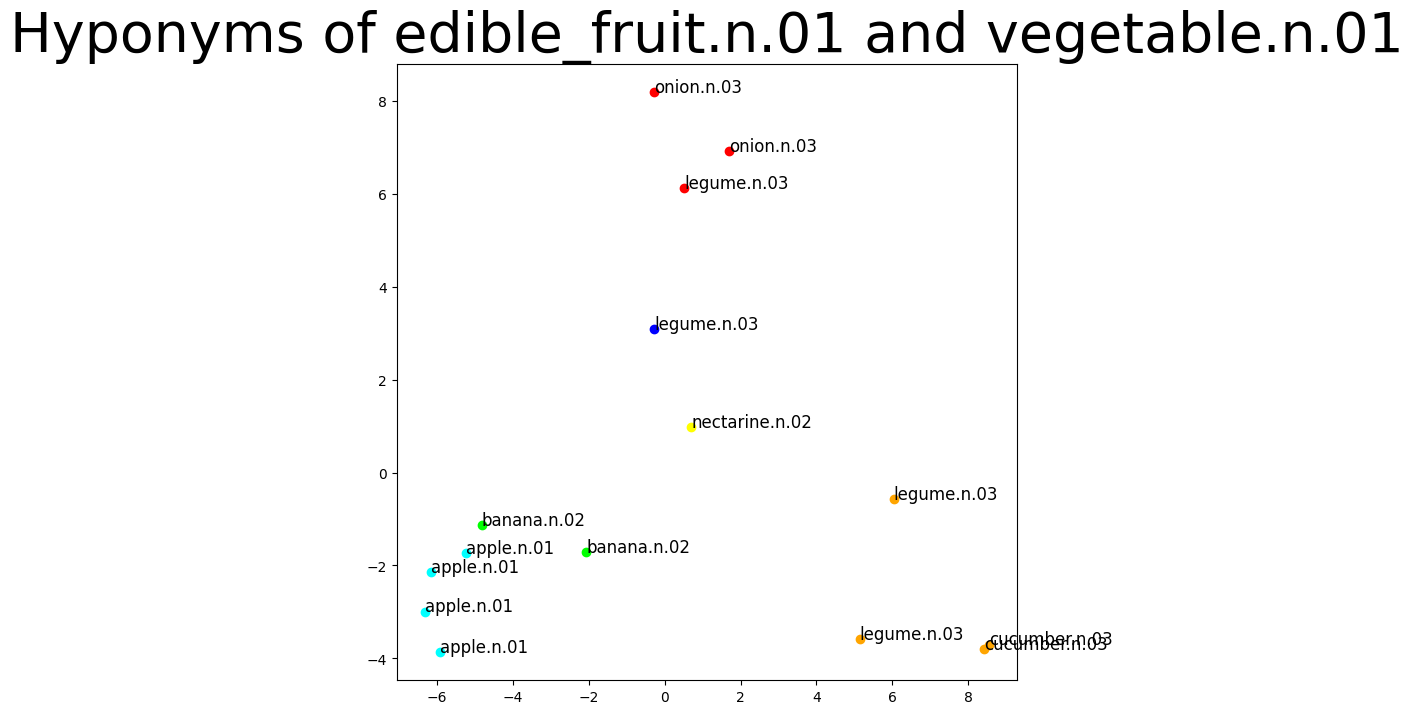

In [ ]:
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(8, 8))
for i in range(len(filtered_labels)):
    x = filtered_labels[i][0].values
    y = filtered_labels[i][1].values
    label = filtered_labels[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Hyponyms of edible_fruit.n.01 and vegetable.n.01", fontsize = 40)
plt.show()

#Hypernyms of car.n.01 --> Hyponyms of motor_vehicle.n.01

In [ ]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [ ]:
wn.synset('car.n.01').hypernyms()

[Synset('motor_vehicle.n.01')]

In [ ]:
wn.synset('motor_vehicle.n.01').hyponyms()

[Synset('amphibian.n.01'),
 Synset('bloodmobile.n.01'),
 Synset('car.n.01'),
 Synset('doodlebug.n.01'),
 Synset('four-wheel_drive.n.01'),
 Synset('go-kart.n.01'),
 Synset('golfcart.n.01'),
 Synset('hearse.n.01'),
 Synset('motorcycle.n.01'),
 Synset('snowplow.n.01'),
 Synset('truck.n.01')]

In [ ]:
hyponyms_sentences = []

In [ ]:
hyponyms_sentences.append((wn.synset('car.n.01').examples()[0], 'car.n.01'))
hyponyms_sentences.append(('He needs an automobile to get to work.', 'car.n.01'))
hyponyms_sentences.append(('He came on a motorcycle.', 'motorcycle.n.01'))
hyponyms_sentences.append(('He needed a truck to move all of his things.', 'truck.n.01'))
hyponyms_sentences.append(('She had to ask for assistance from the army who used an amphibious vehicle to rescue us', 'amphibian.n.01'))
hyponyms_sentences.append(('The so-called roadways to the plots are so boggy that one would need a four-wheel-drive amphibious vehicle to reach them.', 'amphibian.n.01'))

In [ ]:
hyponyms_sentences

[('he needs a car to get to work', 'car.n.01'),
 ('He needs an automobile to get to work.', 'car.n.01'),
 ('He came on a motorcycle.', 'motorcycle.n.01'),
 ('He needed a truck to move all of his things.', 'truck.n.01'),
 ('She had to ask for assistance from the army who used an amphibious vehicle to rescue us',
  'amphibian.n.01'),
 ('The so-called roadways to the plots are so boggy that one would need a four-wheel-drive amphibious vehicle to reach them.',
  'amphibian.n.01')]

In [ ]:
hyponyms_tuples = []

In [ ]:
hyponyms = ['car', 'motorcar', 'automobile', 'hearse', 'golfcart', 'motorcycle', 'truck', 'amphibious']

In [ ]:
for index, sentence in enumerate(hyponyms_sentences):
  tokens = tokenizer.tokenize(sentence[0])
  tokens = ['[CLS]'] + tokens + ['[SEP]']
  print(tokens)

  for w in hyponyms:
    for token_index, t in enumerate(tokens):
      if w == t:
        word_index = token_index
        print(word_index)
        print()
 
  attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = torch.tensor(token_ids).unsqueeze(0)
  attention_mask = torch.tensor(attention_mask).unsqueeze(0)
  last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
  embedding = last_hidden_state[0][word_index].detach().numpy()
  new_tuple = (sentence[1], sentence[0], embedding)
  hyponyms_tuples.append(new_tuple)

['[CLS]', 'he', 'needs', 'a', 'car', 'to', 'get', 'to', 'work', '[SEP]']
4

['[CLS]', 'he', 'needs', 'an', 'automobile', 'to', 'get', 'to', 'work', '.', '[SEP]']
4

['[CLS]', 'he', 'came', 'on', 'a', 'motorcycle', '.', '[SEP]']
5

['[CLS]', 'he', 'needed', 'a', 'truck', 'to', 'move', 'all', 'of', 'his', 'things', '.', '[SEP]']
4

['[CLS]', 'she', 'had', 'to', 'ask', 'for', 'assistance', 'from', 'the', 'army', 'who', 'used', 'an', 'amphibious', 'vehicle', 'to', 'rescue', 'us', '[SEP]']
13

['[CLS]', 'the', 'so', '-', 'called', 'roadway', '##s', 'to', 'the', 'plots', 'are', 'so', 'bog', '##gy', 'that', 'one', 'would', 'need', 'a', 'four', '-', 'wheel', '-', 'drive', 'amphibious', 'vehicle', 'to', 'reach', 'them', '.', '[SEP]']
24



In [ ]:
car = ('He goes to work in a motorcar.', 'car.n.01')
hearse = ('The first vehicle in the procession was a hearse.', 'hearse.n.01')
golfcart = ('The golfers used a golfcart.', 'golfcart.n.01')

In [ ]:
#get embedding for car
tokens = tokenizer.tokenize(car[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][7].detach().numpy() + last_hidden_state[0][8].detach().numpy()) / 2
new_tuple = (car[1], car[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'he', 'goes', 'to', 'work', 'in', 'a', 'motor', '##car', '.', '[SEP]']


In [ ]:
#get embedding for hearse
tokens = tokenizer.tokenize(hearse[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][9].detach().numpy() + last_hidden_state[0][10].detach().numpy()) / 2
new_tuple = (hearse[1], hearse[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'the', 'first', 'vehicle', 'in', 'the', 'procession', 'was', 'a', 'hears', '##e', '.', '[SEP]']


In [ ]:
#get embedding for golfcart
tokens = tokenizer.tokenize(golfcart[0])
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
last_hidden_state, pooler_output, hidden_states = model(token_ids, attention_mask = attention_mask, return_dict = False)
embedding = (last_hidden_state[0][6].detach().numpy() + last_hidden_state[0][7].detach().numpy() + last_hidden_state[0][8].detach().numpy()) / 3
new_tuple = (golfcart[1], golfcart[0], embedding)
hyponyms_tuples.append(new_tuple)

['[CLS]', 'the', 'golfer', '##s', 'used', 'a', 'golf', '##car', '##t', '.', '[SEP]']


In [ ]:
num_clusters = 6

In [ ]:
cluster = AgglomerativeClustering(linkage='average',n_clusters=num_clusters).fit([t[2] for t in hyponyms_tuples]) 
cluster.labels_

array([0, 0, 5, 2, 1, 1, 0, 4, 3])

In [ ]:
# dimensionality reduction using PCA
pca = PCA(n_components=2)
result = pca.fit_transform([t[2] for t in hyponyms_tuples])

In [ ]:
# creating a dataframe from the results
df = pd.DataFrame(result, [t[1] for t in hyponyms_tuples])

In [ ]:
df['Cluster'] = cluster.labels_

In [ ]:
df['Synset'] = [t[0] for t in hyponyms_tuples]

In [ ]:
df

,0,1,Cluster,Synset
he needs a car to get to work,-4.913650,-3.988051,0,car.n.01
He needs an automobile to get to work.,-4.522969,-4.832355,0,car.n.01
He came on a motorcycle.,-3.848022,4.534015,5,motorcycle.n.01
He needed a truck to move all of his things.,-4.354596,-4.350102,2,truck.n.01
She had to ask for assistance from the army who used an amphibious vehicle to rescue us,8.818075,-2.081678,1,amphibian.n.01
The so-called roadways to the plots are so boggy that one would need a four-wheel-drive amphibious vehicle to reach them.,9.812832,-2.369683,1,amphibian.n.01
He goes to work in a motorcar.,-1.789456,3.266763,0,car.n.01
The first vehicle in the procession was a hearse.,-0.270201,4.470082,4,hearse.n.01
The golfers used a golfcart.,1.067989,5.351010,3,golfcart.n.01


In [ ]:
#separates each cluster label into filtered labels
filtered_labels = {}
for i in range(num_clusters):
    filtered_labels[i] = df[df["Cluster"] == i]

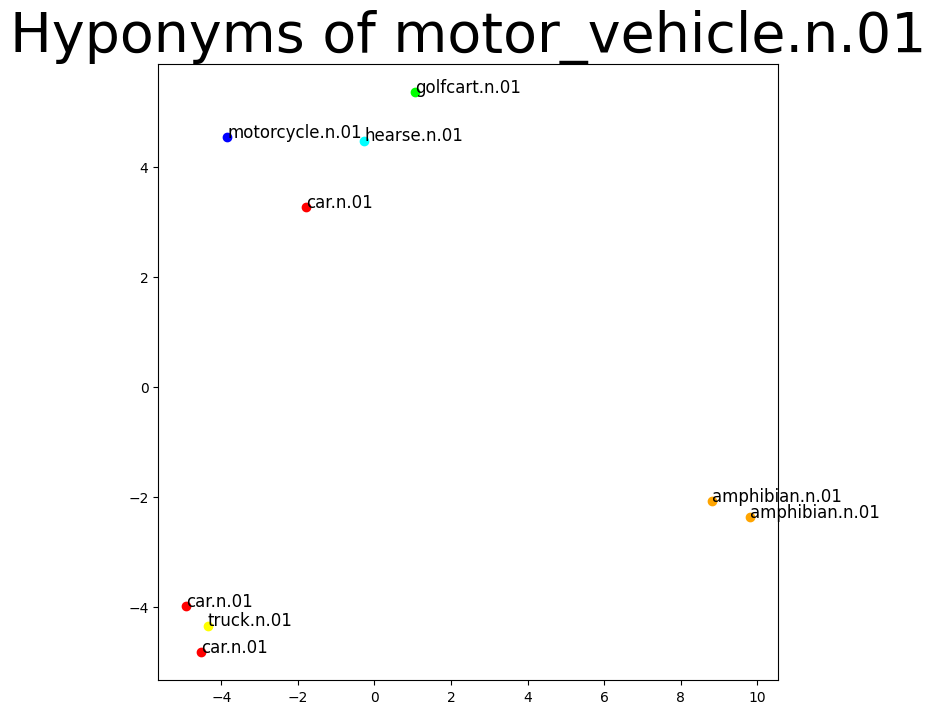

In [ ]:
#colors used on plot
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#FF00FF', '#800000', '#808000', '#008000', '#008080', '#000080', '#800080', '#FFC0CB', '#000000', '#C0C0C0', '#808080', '#5A5A5A', '#FF7F50', '#F08080', '#E0FFFF', '#B0E0E6', '#ADD8E6', '#87CEFA', '#00BFFF', '#1E90FF', '#4169E1', '#4B0082', '#6A5ACD', '#8A2BE2', '#9400D3', '#FF1493', '#FF69B4', '#DC143C', '#FFD700', '#B8860B', '#DAA520', '#F0E68C', '#7CFC00', '#00FF7F', '#228B22', '#6B8E23', '#2F4F4F', '#A9A9A9', '#696969', '#FFA07A', '#FA8072', '#B22222']

#plot results
plt.figure(figsize=(8, 8))
for i in range(len(filtered_labels)):
    x = filtered_labels[i][0].values
    y = filtered_labels[i][1].values
    label = filtered_labels[i]['Synset'].values
    plt.scatter(x, y, color=colors[i])
    for j in range(len(x)):
        plt.text(x[j], y[j], label[j], fontsize=12, color='black')
plt.title("Hyponyms of motor_vehicle.n.01", fontsize = 40)
plt.show()